**Dataset:<br>**
Home Credit Default Risk<br>
https://www.kaggle.com/competitions/home-credit-default-risk/data

# **Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


In [ ]:
df = pd.read_csv("application_train.csv")
df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...               0.0              0.0              0.0              0.0   
1  ...               0.0              0.0              0.0              0.0   
2  ...               0.0              0.0              0.0              0.0   
3  ...               0.0              0.0              0.0              0.0   
4  ...               0.0              0.0              0.0              0.0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  275611.000000  275611.000000  275611.000000      2.756110e+05   
mean   259709.186945       0.080929       0.416703      1.688823e+05   
std     92122.289083       0.272727       0.722616      2.481010e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    179911.500000       0.000000       0.000000      1.125000e+05   
50%    259817.000000       0.000000       0.000000      1.485000e+05   
75%    339588.500000       0.000000       1.000000      2.025000e+05   
max    419389.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  2.756110e+05  275599.000000     2.753650e+05   
mean   5.996125e+05   27130.184411     5.389432e+05   
std    4.029604e+05   14528.847847     3.699113e+05   
min    4.500000e+04    1980.000000     4.500000e+04   
25%    2.700000e+05   16533.000000     2.385000e+05   
50%    5.146020e+05   24916.500000     4.500000e+05   
75%    8.086500e+05   34641.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               275611.000000  275611.000000  275611.000000  ...   
mean                     0.020862  -16036.531191   63820.717533  ...   
std                      0.013830    4367.120996  141282.343475  ...   
min                      0.000290  -25229.000000  -17583.000000  ...   
25%                      0.010006  -19685.000000   -2764.000000  ...   
50%                      0.018850  -15745.000000   -1213.000000  ...   
75%                      0.028663  -12409.000000    -288.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     275610.000000     275610.000000     275610.000000     275610.000000   
mean           0.008222          0.000602          0.000497          0.000348   
std            0.090301          0.024534          0.022290          0.018660   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               238416.000000               238416.00000   
mean                     0.006443                    0.00703   
std                      0.084494                    0.11124   
min                      0.000000                    0.00000   
25%                      0.000000                    0.00000   
50%                      0.000000                    0.00000   
75%                      0.000000                    0.00000   
max                      4.000000                    9.00000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               238416.000000              238416.000000   
mean                     0.034306                   0.266001   
std                      0.204785                   0.912122   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              238416.000000               238416.000000  
mean                    0.265259                    1.894554  
std                     0.812271                    1.868128  
min                     0.000000                    0.000000  
25%              

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
df.shape

(307511, 122)

In [ ]:
kolom = df.columns

for i in kolom :
  print(i)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

In [ ]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
df.dtypes

TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 121, dtype: object

## Checking Missing Values

In [ ]:
cats = [i for i in df.columns if df[i].dtype == 'object' and i != 'SK_ID_CURR']
nums = [i for i in df.columns if df[i].dtype != 'object']

In [ ]:
print('Total Missing Values')
for i in nums:
    print('  '+i+': '+str(df[i].isnull().sum()))

Total Missing Values
  SK_ID_CURR: 0
  TARGET: 0
  CNT_CHILDREN: 0
  AMT_INCOME_TOTAL: 0
  AMT_CREDIT: 0
  AMT_ANNUITY: 12
  AMT_GOODS_PRICE: 278
  REGION_POPULATION_RELATIVE: 0
  DAYS_BIRTH: 0
  DAYS_EMPLOYED: 0
  DAYS_REGISTRATION: 0
  DAYS_ID_PUBLISH: 0
  OWN_CAR_AGE: 202929
  FLAG_MOBIL: 0
  FLAG_EMP_PHONE: 0
  FLAG_WORK_PHONE: 0
  FLAG_CONT_MOBILE: 0
  FLAG_PHONE: 0
  FLAG_EMAIL: 0
  CNT_FAM_MEMBERS: 2
  REGION_RATING_CLIENT: 0
  REGION_RATING_CLIENT_W_CITY: 0
  HOUR_APPR_PROCESS_START: 0
  REG_REGION_NOT_LIVE_REGION: 0
  REG_REGION_NOT_WORK_REGION: 0
  LIVE_REGION_NOT_WORK_REGION: 0
  REG_CITY_NOT_LIVE_CITY: 0
  REG_CITY_NOT_WORK_CITY: 0
  LIVE_CITY_NOT_WORK_CITY: 0
  EXT_SOURCE_1: 173378
  EXT_SOURCE_2: 660
  EXT_SOURCE_3: 60965
  APARTMENTS_AVG: 156061
  BASEMENTAREA_AVG: 179943
  YEARS_BEGINEXPLUATATION_AVG: 150007
  YEARS_BUILD_AVG: 204488
  COMMONAREA_AVG: 214865
  ELEVATORS_AVG: 163891
  ENTRANCES_AVG: 154828
  FLOORSMAX_AVG: 153020
  FLOORSMIN_AVG: 208642
  LANDAREA_AVG: 1

Ada 60 kolom yang terdapat Missing Values pada dataset Home Credit, berikut detailnya :
1. AMT_ANNUITY: 12
2. AMT_GOODS_PRICE: 278
3. CNT_FAM_MEMBERS: 2
4. EXT_SOURCE_1: 173378
5. EXT_SOURCE_2: 660
6.  EXT_SOURCE_3: 60965
7. APARTMENTS_AVG: 156061
8.  BASEMENTAREA_AVG: 179943
9.  YEARS_BEGINEXPLUATATION_AVG: 150007
10.  YEARS_BUILD_AVG: 204488
11.  COMMONAREA_AVG: 214865
12.  ELEVATORS_AVG: 163891
13.  ENTRANCES_AVG: 154828
14.  FLOORSMAX_AVG: 153020
15.  FLOORSMIN_AVG: 208642
16.  LANDAREA_AVG: 182590
17.  LIVINGAPARTMENTS_AVG: 210199
18.  LIVINGAREA_AVG: 154350
19.  NONLIVINGAPARTMENTS_AVG: 213514
20.  NONLIVINGAREA_AVG: 169682
21.  APARTMENTS_MODE: 156061
22.  BASEMENTAREA_MODE: 179943
23.  YEARS_BEGINEXPLUATATION_MODE: 150007
24.  YEARS_BUILD_MODE: 204488
25.  COMMONAREA_MODE: 214865
26.  ELEVATORS_MODE: 163891
27.  ENTRANCES_MODE: 154828
28.  FLOORSMAX_MODE: 153020
29.  FLOORSMIN_MODE: 208642
30.  LANDAREA_MODE: 182590
31.  LIVINGAPARTMENTS_MODE: 210199
32.  LIVINGAREA_MODE: 154350
33.  NONLIVINGAPARTMENTS_MODE: 213514
34.  NONLIVINGAREA_MODE: 169682
35.  APARTMENTS_MEDI: 156061
36.  BASEMENTAREA_MEDI: 179943
37.  YEARS_BEGINEXPLUATATION_MEDI: 150007
38.  YEARS_BUILD_MEDI: 204488
39.  COMMONAREA_MEDI: 214865
40.  ELEVATORS_MEDI: 163891
41.  ENTRANCES_MEDI: 154828
42.  FLOORSMAX_MEDI: 153020
43.  FLOORSMIN_MEDI: 208642
44.  LANDAREA_MEDI: 182590
45.  LIVINGAPARTMENTS_MEDI: 210199
46.  LIVINGAREA_MEDI: 154350
47.  NONLIVINGAPARTMENTS_MEDI: 213514
48.  NONLIVINGAREA_MEDI: 169682
49.  TOTALAREA_MODE: 148431
50.  OBS_30_CNT_SOCIAL_CIRCLE: 1021
51.  DEF_30_CNT_SOCIAL_CIRCLE: 1021
52.  OBS_60_CNT_SOCIAL_CIRCLE: 1021
53.  DEF_60_CNT_SOCIAL_CIRCLE: 1021
54.  DAYS_LAST_PHONE_CHANGE: 1
55.  AMT_REQ_CREDIT_BUREAU_HOUR: 41519
56.  AMT_REQ_CREDIT_BUREAU_DAY: 41519
57.  AMT_REQ_CREDIT_BUREAU_WEEK: 41519
58.  AMT_REQ_CREDIT_BUREAU_MON: 41519
59.  AMT_REQ_CREDIT_BUREAU_QRT: 41519
60.  AMT_REQ_CREDIT_BUREAU_YEAR: 41519

Karena setiap kolom tersebut jumlah missing valuenya rata rata sangat banyak, maka ada beberapa cara yang bisa dilakukan =
- Menghapus kolom yang ada missing valuesnya, tetapi kolom tersebut yang tidak menyimpan informasi penting atau yang signifikan dalam analisis nanti
- Tetap mempertahankan baris dan kolom yang memiliki missing value dengan cara Imputasi nilai, yaitu menggantikan nilai yang hilang dengan nilai perkiraan, seperti menggunakan nilai rata-rata, median, modus, atau teknik yang lebih kompleks seperti regresi atau metode berbasis model.
- Menggunakan variabel indikator, seperti dapat menambahkan kolom biner (0 atau 1) sebagai variabel indikator untuk menunjukkan apakah nilai dalam kolom tersebut hilang atau tidak. Ini memungkinkan model untuk memperhatikan adanya missing values sebagai suatu fitur.
- Metode berbasis model yaitu melibatkan pembuatan model prediktif untuk memperkirakan nilai yang hilang berdasarkan variabel-variabel lain dalam data. Misalnya,menggunakan regresi atau metode machine learning lainnya untuk memprediksi nilai yang hilang berdasarkan variabel independen yang tersedia.

Memeriksa nilai yang hilang dalam persen

In [ ]:
for i in df:
  print(i, ": ", df[i].isna().sum()/len(df)*100)

TARGET :  0.0
NAME_CONTRACT_TYPE :  0.0
CODE_GENDER :  0.0
FLAG_OWN_CAR :  0.0
FLAG_OWN_REALTY :  0.0
CNT_CHILDREN :  0.0
AMT_INCOME_TOTAL :  0.0
AMT_CREDIT :  0.0
AMT_ANNUITY :  0.003902299429939092
AMT_GOODS_PRICE :  0.09040327012692229
NAME_TYPE_SUITE :  0.42014757195677555
NAME_INCOME_TYPE :  0.0
NAME_EDUCATION_TYPE :  0.0
NAME_FAMILY_STATUS :  0.0
NAME_HOUSING_TYPE :  0.0
REGION_POPULATION_RELATIVE :  0.0
DAYS_BIRTH :  0.0
DAYS_EMPLOYED :  0.0
DAYS_REGISTRATION :  0.0
DAYS_ID_PUBLISH :  0.0
OWN_CAR_AGE :  65.9908100848425
FLAG_MOBIL :  0.0
FLAG_EMP_PHONE :  0.0
FLAG_WORK_PHONE :  0.0
FLAG_CONT_MOBILE :  0.0
FLAG_PHONE :  0.0
FLAG_EMAIL :  0.0
OCCUPATION_TYPE :  31.345545362604916
CNT_FAM_MEMBERS :  0.0006503832383231819
REGION_RATING_CLIENT :  0.0
REGION_RATING_CLIENT_W_CITY :  0.0
WEEKDAY_APPR_PROCESS_START :  0.0
HOUR_APPR_PROCESS_START :  0.0
REG_REGION_NOT_LIVE_REGION :  0.0
REG_REGION_NOT_WORK_REGION :  0.0
LIVE_REGION_NOT_WORK_REGION :  0.0
REG_CITY_NOT_LIVE_CITY :  0.0
REG_

## Statistical summary

### Pendekatan numerik

Summary dari pendekatan numerik yaitu =
- Peminjam rata rata berpenghasilan sekitar 168,797.919297 , paling rendah 25,650.0, paling tinggi berpenghasilan 117,000,000.0.
- Untuk beberapa atribut yang lain seperti atribut pada jumlah anak, dan jumlah target masih terlihat ketidak seimbangan, jadi memerlukan analisis lebih lanjut untuk melihat outlier pada atribut tersbut.

In [ ]:
df[nums].describe().T

count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%       50%       75%          max  
SK_ID_CURR                  189145.5  278202.0  367142.5     456255.0  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[106 rows x 8 columns]

### Pendekatan kategorik

Beberapa summary pada pendekatan kategorik=
- Peminjam paling banyak melakukan pinjaman secara tunai (Cash loans) dengan jumlah 278232 dari 307511 peminjam
- Peminjam paling banyak yaitu perempuan (F) dengan jumlah 202448 dari 307511 peminjam.
- Dalam atribut 'FLAG_OWN_CAR' Peminjam paling banyak memiliki nilai "N", itu berarti mayoritas peminjam tidak memiliki mobil
- Dalam atribut 'FLAG_OWN_REALTY' paling banyak memiliki nilai "Y", itu berarti mayoritas memiliki kepemilikan properti real estat.
- Peminjam paling banyak masih dalam posisi bekerja dan sebagai buruh
- Dalam atribut 'NAME_EDUCATION_TYPE' paling banyak memiliki nilai "Secondary / secondary special", itu berarti mayoritas peminjam memiliki tingkat pendidikan menengah atau khusus.
- Peminjam paling banyak berstatus sudah menikah

In [ ]:
df[cats].describe().T

count unique                            top  \
NAME_CONTRACT_TYPE          307511      2                     Cash loans   
CODE_GENDER                 307511      3                              F   
FLAG_OWN_CAR                307511      2                              N   
FLAG_OWN_REALTY             307511      2                              Y   
NAME_TYPE_SUITE             306219      7                  Unaccompanied   
NAME_INCOME_TYPE            307511      8                        Working   
NAME_EDUCATION_TYPE         307511      5  Secondary / secondary special   
NAME_FAMILY_STATUS          307511      6                        Married   
NAME_HOUSING_TYPE           307511      6              House / apartment   
OCCUPATION_TYPE             211120     18                       Laborers   
WEEKDAY_APPR_PROCESS_START  307511      7                        TUESDAY   
ORGANIZATION_TYPE           307511     58         Business Entity Type 3   
FONDKAPREMONT_MODE           97216      4               reg oper account   
HOUSETYPE_MODE              153214      3                 block of flats   
WALLSMATERIAL_MODE          151170      7                          Panel   
EMERGENCYSTATE_MODE         161756      2                             No   

                              freq  
NAME_CONTRACT_TYPE          278232  
CODE_GENDER                 202448  
FLAG_OWN_CAR                202924  
FLAG_OWN_REALTY             213312  
NAME_TYPE_SUITE             248526  
NAME_INCOME_TYPE            158774  
NAME_EDUCATION_TYPE         218391  
NAME_FAMILY_STATUS          196432  
NAME_HOUSING_TYPE           272868  
OCCUPATION_TYPE              55186  
WEEKDAY_APPR_PROCESS_START   53901  
ORGANIZATION_TYPE            67992  
FONDKAPREMONT_MODE           73830  
HOUSETYPE_MODE              150503  
WALLSMATERIAL_MODE           66040  
EMERGENCYSTATE_MODE         159428

In [ ]:
for col in cats:
  print(df[col].value_counts())
  print()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAM

Summary =
- Code_gender (kolom gender) ada 3 kategori : Female (F), Male(M) dan XNA. Untuk XNA perlu dihandling karena ada kemungkinan hilang / kosong. Jadi nantinya hanya ada 2 kategori yaitu Female dan Male saja.

## Korelasi

In [ ]:
# Menghitung koefisien korelasi dengan variabel target
correlation = df.corr()
target_corr = correlation['TARGET'].sort_values(ascending=False)

# Menampilkan variabel yang memiliki korelasi tertinggi
target_corr.head(10)

<ipython-input-24-57d011f2f296>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


TARGET                         1.000000
DAYS_BIRTH                     0.078147
REGION_RATING_CLIENT_W_CITY    0.061077
REGION_RATING_CLIENT           0.058933
DAYS_LAST_PHONE_CHANGE         0.055296
DAYS_ID_PUBLISH                0.051989
REG_CITY_NOT_WORK_CITY         0.051319
FLAG_EMP_PHONE                 0.045759
FLAG_DOCUMENT_3                0.045439
REG_CITY_NOT_LIVE_CITY         0.044934
Name: TARGET, dtype: float64

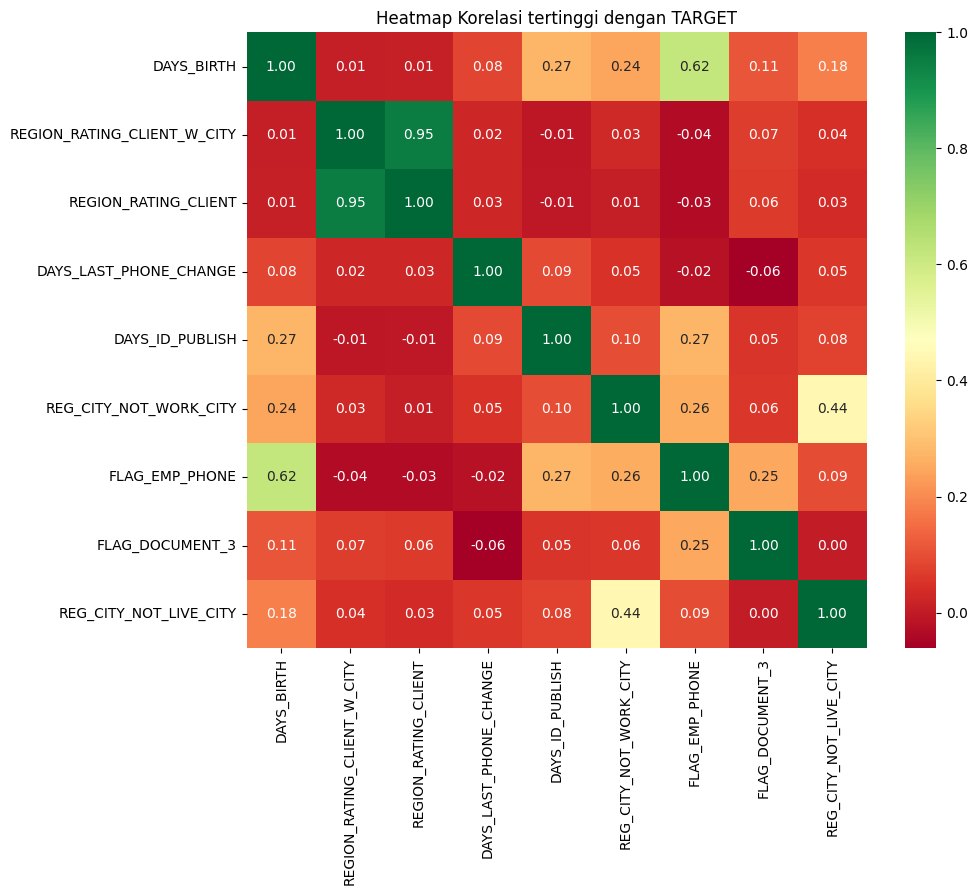

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_columns = ['TARGET', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'FLAG_DOCUMENT_3', 'REG_CITY_NOT_LIVE_CITY']
selected_data = df[selected_columns]

# Menghitung matriks korelasi
corr_matrix = selected_data.corr()

# Membuat plot heatmap
plt.figure(figsize=(10, 8))  # Ukuran plot
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")  # Anotasi nilai dan pilihan skema warna
plt.title('Heatmap Korelasi tertinggi dengan TARGET')  # Judul plot
plt.show()

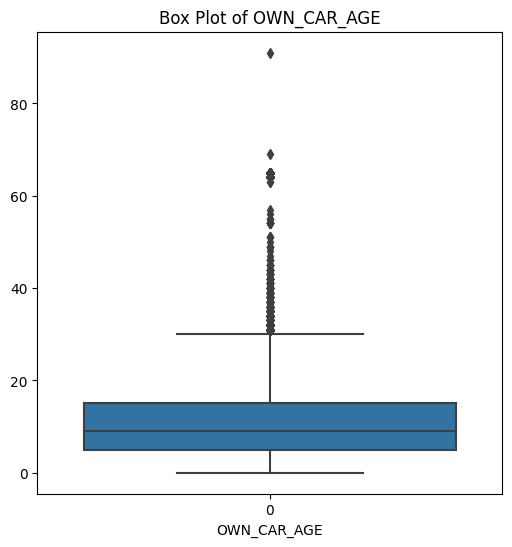

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_column = 'OWN_CAR_AGE'

# Membuat plot box plot
plt.figure(figsize=(6, 6))  # Ukuran plot
sns.boxplot(df[selected_column])  # Box plot
plt.xlabel(selected_column)  # Label sumbu x
plt.title('Box Plot of {}'.format(selected_column))  # Judul plot
plt.show()

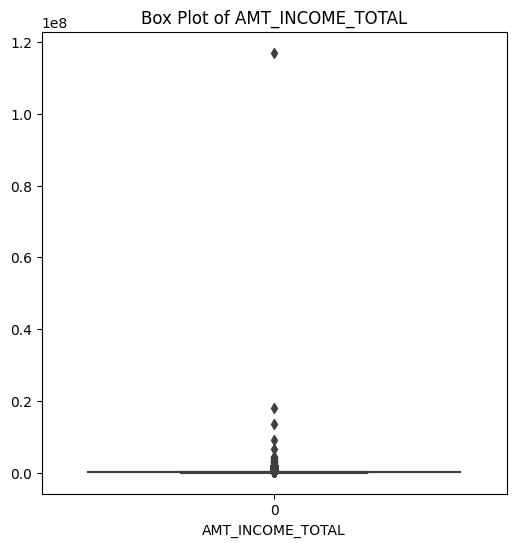

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_column = 'AMT_INCOME_TOTAL'

# Membuat plot box plot
plt.figure(figsize=(6, 6))  # Ukuran plot
sns.boxplot(df[selected_column])  # Box plot
plt.xlabel(selected_column)  # Label sumbu x
plt.title('Box Plot of {}'.format(selected_column))  # Judul plot
plt.show()

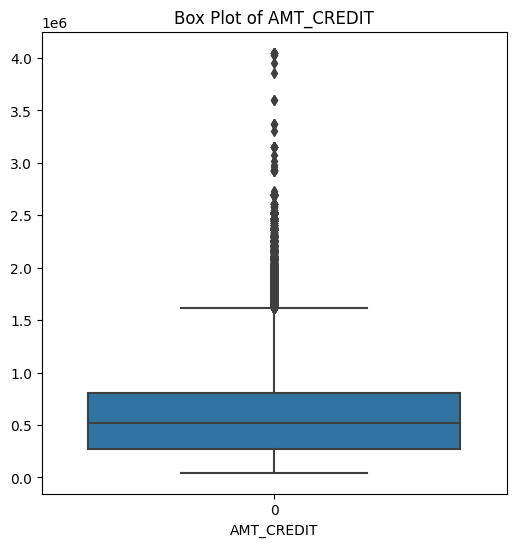

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_column = 'AMT_CREDIT'

# Membuat plot box plot
plt.figure(figsize=(6, 6))  # Ukuran plot
sns.boxplot(df[selected_column])  # Box plot
plt.xlabel(selected_column)  # Label sumbu x
plt.title('Box Plot of {}'.format(selected_column))  # Judul plot
plt.show()

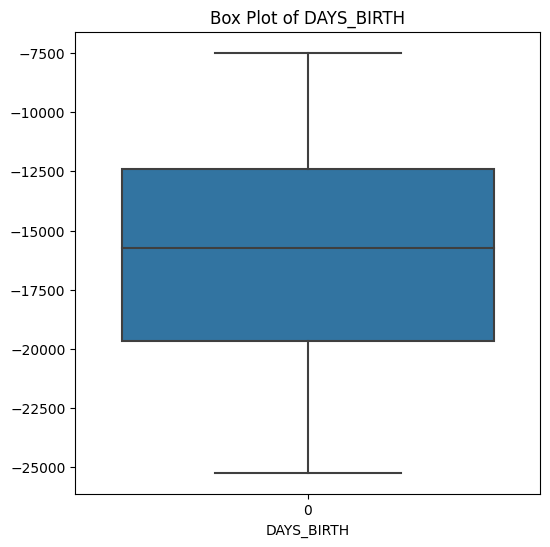

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_column = 'DAYS_BIRTH'

# Membuat plot box plot
plt.figure(figsize=(6, 6))  # Ukuran plot
sns.boxplot(df[selected_column])  # Box plot
plt.xlabel(selected_column)  # Label sumbu x
plt.title('Box Plot of {}'.format(selected_column))  # Judul plot
plt.show()

<ipython-input-58-0c02d3489dde>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(target_0['AMT_INCOME_TOTAL'], label='Target 0', shade=True)  # Plot distribusi untuk Target 0
<ipython-input-58-0c02d3489dde>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(target_1['AMT_INCOME_TOTAL'], label='Target 1', shade=True)  # Plot distribusi untuk Target 1


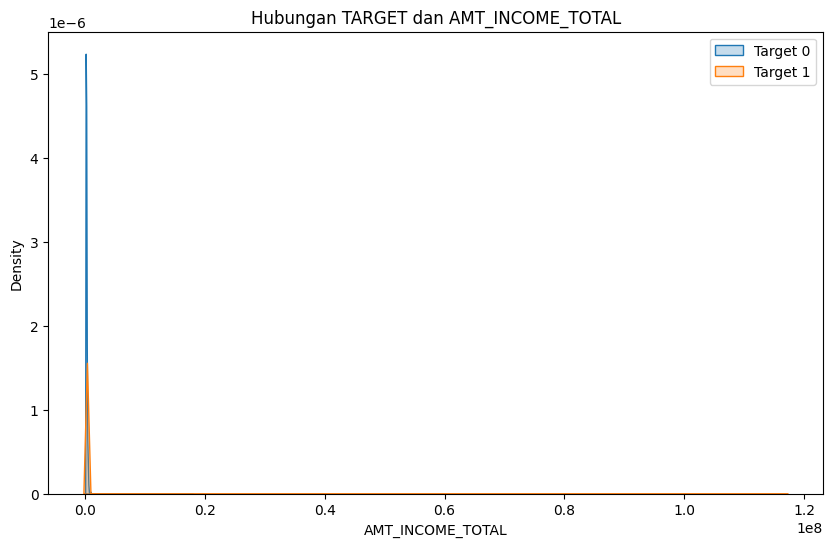

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_columns = ['TARGET', 'AMT_INCOME_TOTAL']
selected_data = df[selected_columns]

# Memisahkan data berdasarkan nilai TARGET
target_0 = selected_data[selected_data['TARGET'] == 0]
target_1 = selected_data[selected_data['TARGET'] == 1]

# Membuat plot
plt.figure(figsize=(10, 6))  # Ukuran plot
sns.kdeplot(target_0['AMT_INCOME_TOTAL'], label='Target 0', shade=True)  # Plot distribusi untuk Target 0
sns.kdeplot(target_1['AMT_INCOME_TOTAL'], label='Target 1', shade=True)  # Plot distribusi untuk Target 1
plt.xlabel('AMT_INCOME_TOTAL')  # Label sumbu x
plt.ylabel('Density')  # Label sumbu y
plt.title('Hubungan TARGET dan AMT_INCOME_TOTAL')  # Judul plot
plt.legend()  # Menampilkan legenda
plt.show()

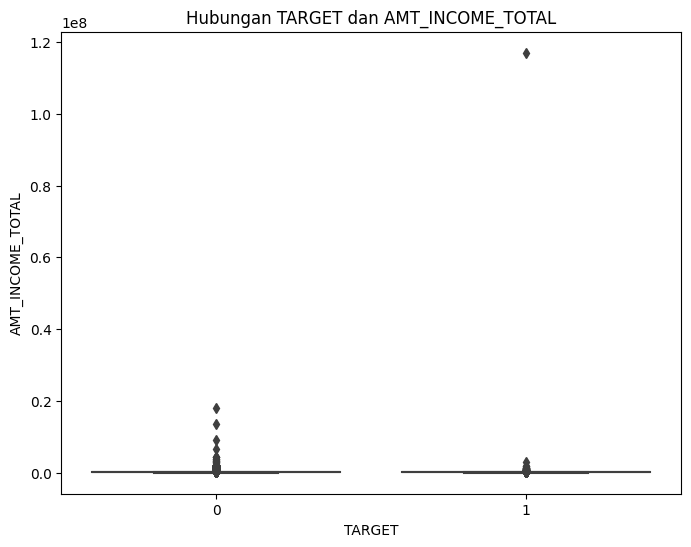

In [ ]:
# Memilih kolom yang ingin ditampilkan
selected_columns = ['TARGET', 'AMT_INCOME_TOTAL']
selected_data = df[selected_columns]

# Membuat plot box plot
plt.figure(figsize=(8, 6))  # Ukuran plot
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=selected_data)  # Box plot
plt.xlabel('TARGET')  # Label sumbu x
plt.ylabel('AMT_INCOME_TOTAL')  # Label sumbu y
plt.title('Hubungan TARGET dan AMT_INCOME_TOTAL')  # Judul plot
plt.show()

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

 # Hitung persentase target=1 per nilai kategori
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

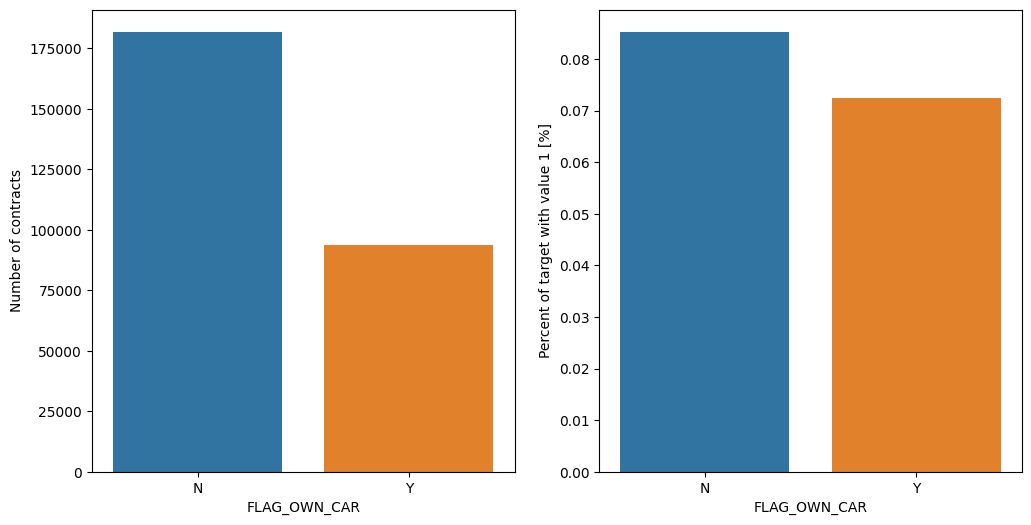

In [ ]:
plot_stats('FLAG_OWN_CAR')

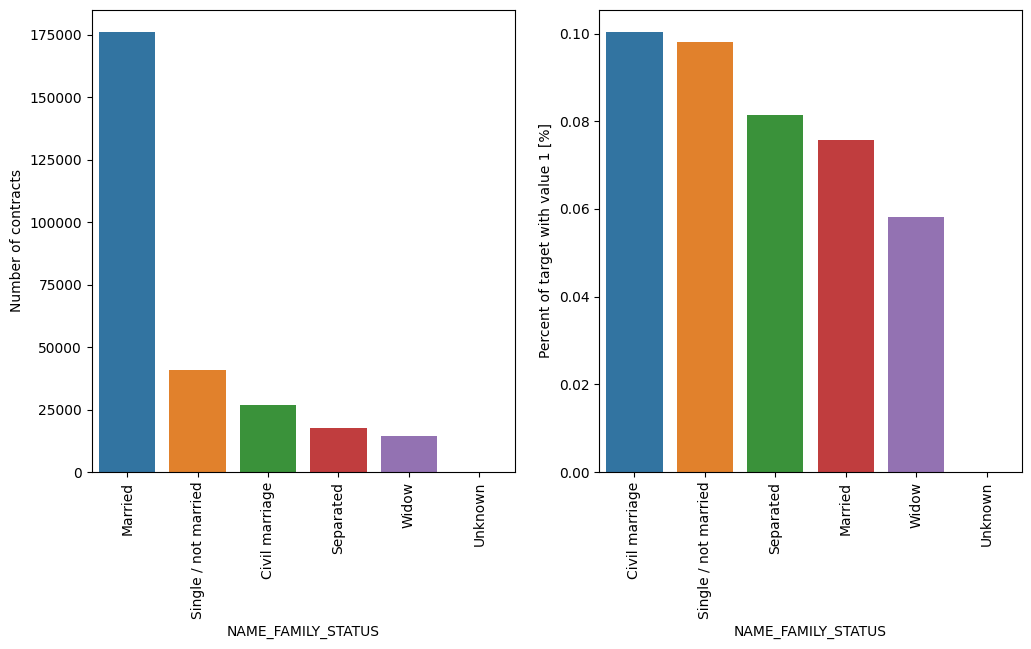

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

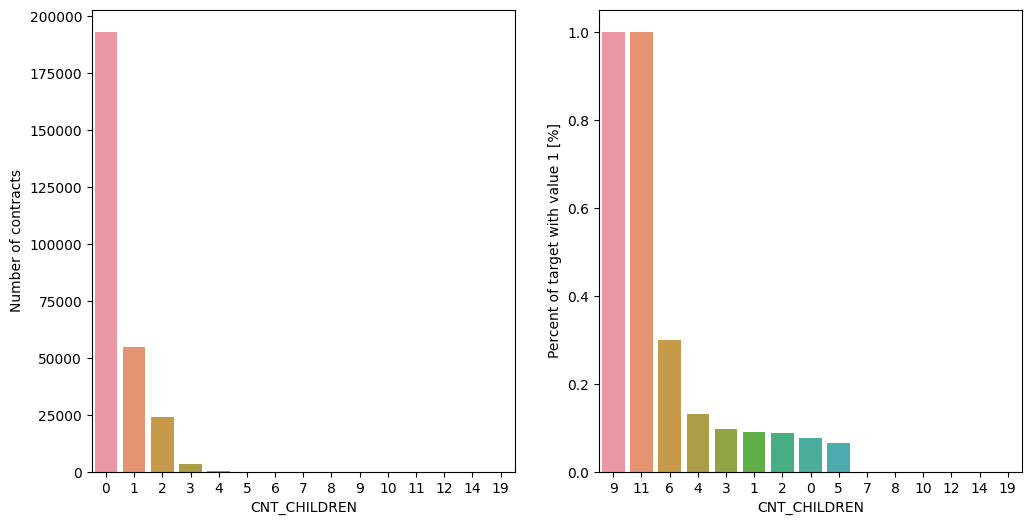

In [ ]:
plot_stats('CNT_CHILDREN')

Sebagian besar yang mengambil pinjaman tidak memiliki anak. Jumlah pinjaman yang memiliki satu anak 4 kali lebih kecil, jumlah pinjaman yang terkait dengan klien dengan dua anak 8 kali lebih kecil; klien dengan 3, 4 anak atau lebih jauh lebih jarang.

Untuk pelunasan, peminjam tanpa anak, 1, 2, 3, dan 5 anak memiliki persentase tidak melunasi rata-rata sekitar (10%). peminjam dengan 4 dan 6 anak berada di atas rata-rata dalam hal persentase pinjaman yang tidak dibayar kembali (lebih dari 25% untuk keluarga dengan 6 anak).

Sedangkan untuk peminjam dengan 9 atau 11 anak, persentase pinjaman yang tidak dilunasi adalah 100%.

<ipython-input-21-fe9ee7992e44>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


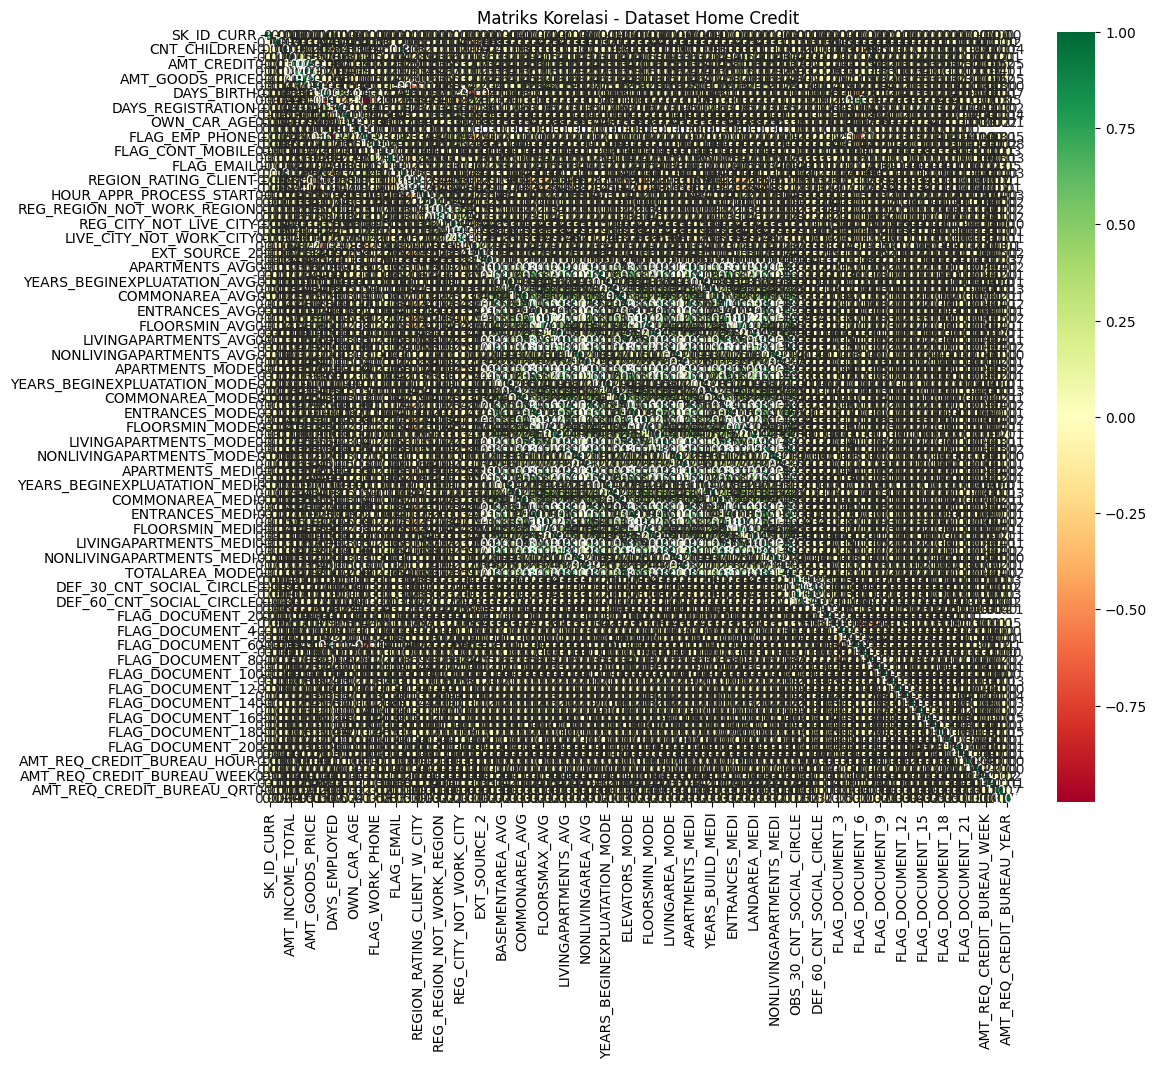

In [ ]:
# Menghitung matriks korelasi
corr_matrix = df.corr()

# Membuat plot matriks korelasi
plt.figure(figsize=(50, 50))  # Ukuran plot
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', fmt=".2f")  # Anotasi nilai dan pilihan skema warna
plt.title('Matriks Korelasi - Dataset Home Credit')  # Judul plot
plt.show()

In [ ]:
# Menentukan batas atas dan batas bawah IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menampilkan data yang outlier
outliers = df[(df< lower_bound) | (df > upper_bound)]
print(outliers)

<ipython-input-11-e40a59537699>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-11-e40a59537699>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-11-e40a59537699>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[(df< lower_bound) | (df > upper_bound)]


        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0              NaN     1.0                NaN         NaN          NaN   
1              NaN     NaN                NaN         NaN          NaN   
2              NaN     NaN                NaN         NaN          NaN   
3              NaN     NaN                NaN         NaN          NaN   
4              NaN     NaN                NaN         NaN          NaN   
...            ...     ...                ...         ...          ...   
275606         NaN     NaN                NaN         NaN          NaN   
275607         NaN     NaN                NaN         NaN          NaN   
275608         NaN     NaN                NaN         NaN          NaN   
275609         NaN     NaN                NaN         NaN          NaN   
275610         NaN     NaN                NaN         NaN          NaN   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                  NaN           NaN     

distribusi 'target' sangat tidak seimbang dengan 80% klien membayar kembali pinjaman mereka tepat waktu.  Ketika distribusi variabel 'target' tidak seimbang, accuracy bukan metrik yang baik untuk mengevaluasi kinerja model.

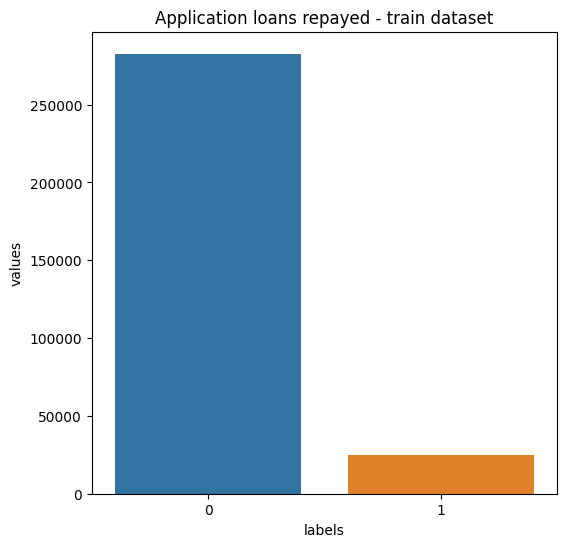

In [ ]:
temp = df["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

# **Data Preparation**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("D:/Download/Compressed/home-credit-default-risk/application_train.csv", encoding='ISO-8859–1')
df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21   
0  ...                 0                0                0                0  \
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY   
0                        0.0                       0.0  \
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
0                         0.0                        0.0  \
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

In [ ]:
print('Jumlah baris dan kolom:', df.shape)
print('Jumlah elemen:', df.size)

Jumlah baris dan kolom: (307511, 122)
Jumlah elemen: 37516342


<Axes: >

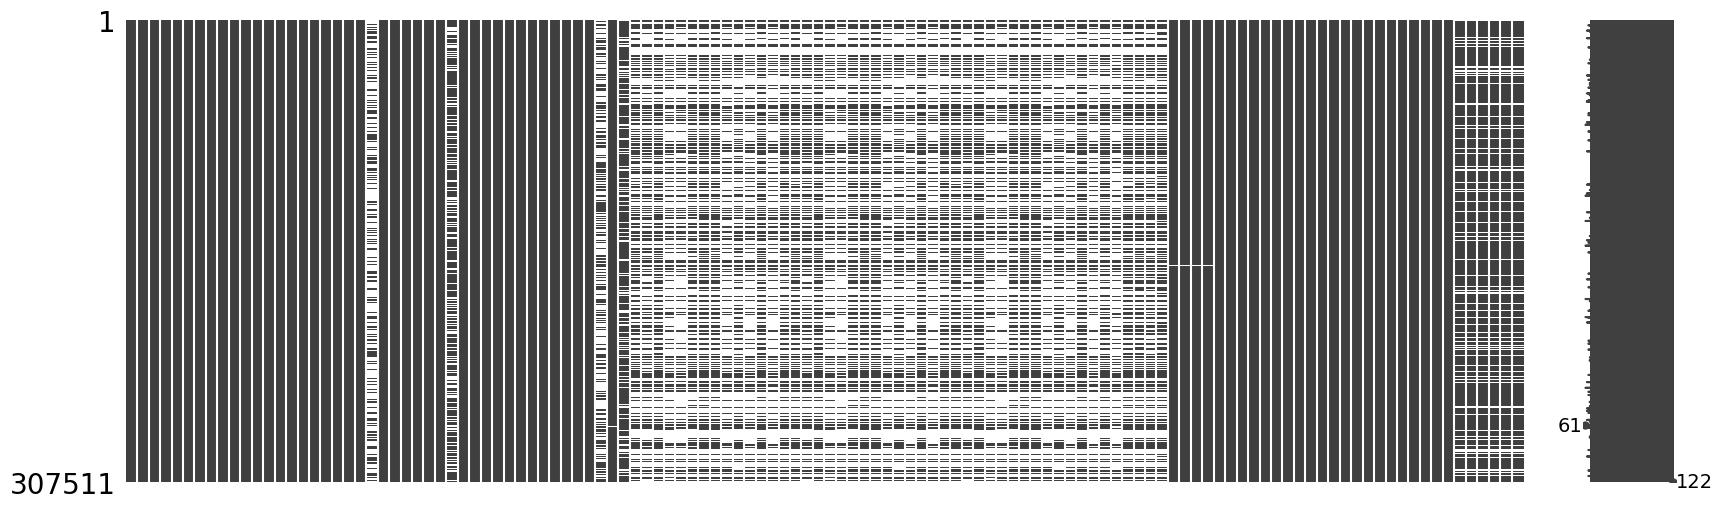

In [ ]:
import missingno as mno

mno.matrix(df, figsize=(20, 6))

### Column with 65% missing values

Melihat banyaknya missing values setiap kolom dalam persen. Kolom dengan missing values lebih dari 65% akan didrop. Tidak mungkin untuk menghapus semua baris dengan missing values karena akan menghilangkan lebih dari 50% baris data.

In [ ]:
data = {
    'coloumn' : [],
    'persentage' : []
}

for i in df :
  data['coloumn'].append(i)
  data['persentage'].append((df[i].isna().sum()/len(df))*100)

df_isna = pd.DataFrame(data)

df_isna.sort_values('persentage', ascending=False).head(17)

coloumn  persentage
76           COMMONAREA_MEDI   69.872297
48            COMMONAREA_AVG   69.872297
62           COMMONAREA_MODE   69.872297
70  NONLIVINGAPARTMENTS_MODE   69.432963
56   NONLIVINGAPARTMENTS_AVG   69.432963
84  NONLIVINGAPARTMENTS_MEDI   69.432963
86        FONDKAPREMONT_MODE   68.386172
68     LIVINGAPARTMENTS_MODE   68.354953
54      LIVINGAPARTMENTS_AVG   68.354953
82     LIVINGAPARTMENTS_MEDI   68.354953
52             FLOORSMIN_AVG   67.848630
66            FLOORSMIN_MODE   67.848630
80            FLOORSMIN_MEDI   67.848630
75          YEARS_BUILD_MEDI   66.497784
61          YEARS_BUILD_MODE   66.497784
47           YEARS_BUILD_AVG   66.497784
21               OWN_CAR_AGE   65.990810

In [ ]:
df = df[df_isna[df_isna['persentage'] <= 65]['coloumn']]
df.head(3)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR   
0      100002       1         Cash loans           M            N  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY   
0               Y             0          202500.0    406597.5      24700.5  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21   
0  ...                 0                0                0                0  \
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY   
0                        0.0                       0.0  \
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON   
0                         0.0                        0.0  \
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 105 columns]

In [ ]:
print('Jumlah baris dan kolom:', df.shape)
print('Jumlah elemen:', df.size)

Jumlah baris dan kolom: (307511, 105)
Jumlah elemen: 32288655


<Axes: >

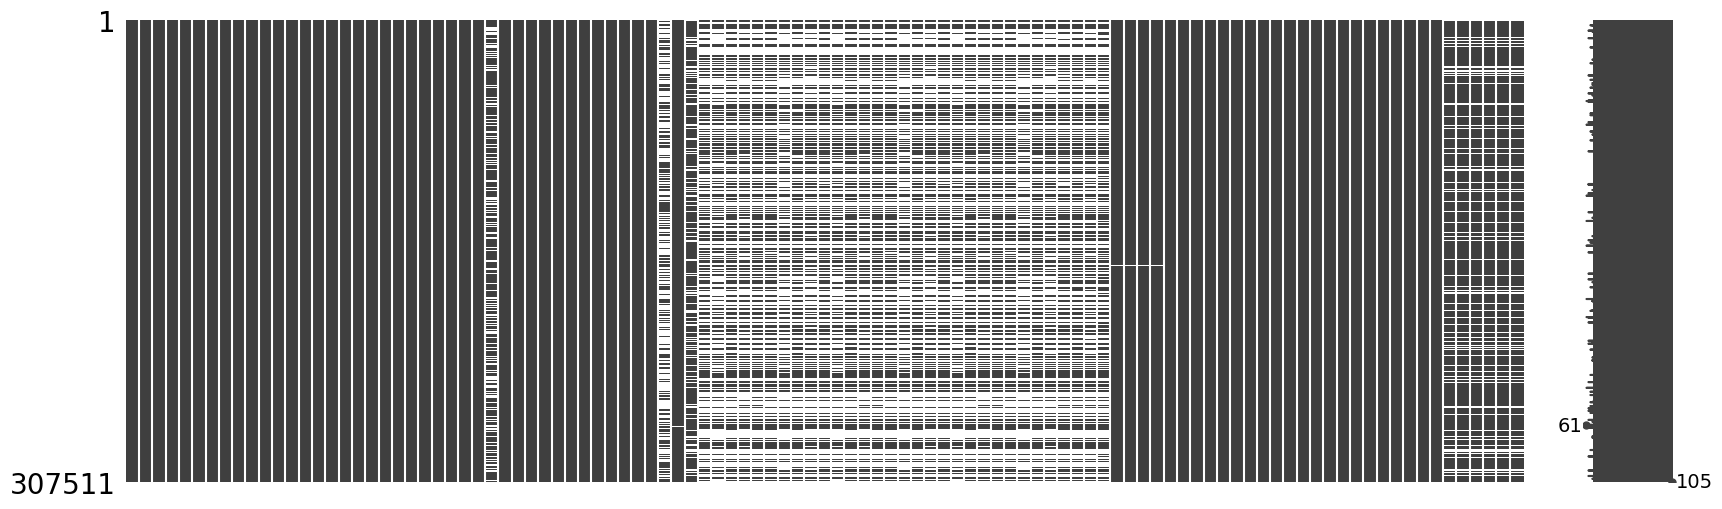

In [ ]:
mno.matrix(df, figsize=(20, 6))

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

## Missing Values Handling Numerical Data

Kolom numerik akan diisi dengan regresi linear dengan kolom-kolom lain yang memiliki relasi sebagai input.

In [ ]:
print('Total Missing Values')
for i in num_cols:
    print('  '+i+': '+str(df[i].isnull().sum()))

Total Missing Values
  SK_ID_CURR: 0
  TARGET: 0
  CNT_CHILDREN: 0
  AMT_INCOME_TOTAL: 0
  AMT_CREDIT: 0
  AMT_ANNUITY: 12
  AMT_GOODS_PRICE: 278
  REGION_POPULATION_RELATIVE: 0
  DAYS_BIRTH: 0
  DAYS_EMPLOYED: 0
  DAYS_REGISTRATION: 0
  DAYS_ID_PUBLISH: 0
  FLAG_MOBIL: 0
  FLAG_EMP_PHONE: 0
  FLAG_WORK_PHONE: 0
  FLAG_CONT_MOBILE: 0
  FLAG_PHONE: 0
  FLAG_EMAIL: 0
  CNT_FAM_MEMBERS: 2
  REGION_RATING_CLIENT: 0
  REGION_RATING_CLIENT_W_CITY: 0
  HOUR_APPR_PROCESS_START: 0
  REG_REGION_NOT_LIVE_REGION: 0
  REG_REGION_NOT_WORK_REGION: 0
  LIVE_REGION_NOT_WORK_REGION: 0
  REG_CITY_NOT_LIVE_CITY: 0
  REG_CITY_NOT_WORK_CITY: 0
  LIVE_CITY_NOT_WORK_CITY: 0
  EXT_SOURCE_1: 173378
  EXT_SOURCE_2: 660
  EXT_SOURCE_3: 60965
  APARTMENTS_AVG: 156061
  BASEMENTAREA_AVG: 179943
  YEARS_BEGINEXPLUATATION_AVG: 150007
  ELEVATORS_AVG: 163891
  ENTRANCES_AVG: 154828
  FLOORSMAX_AVG: 153020
  LANDAREA_AVG: 182590
  LIVINGAREA_AVG: 154350
  NONLIVINGAREA_AVG: 169682
  APARTMENTS_MODE: 156061
  BASEMENTAR

<Axes: >

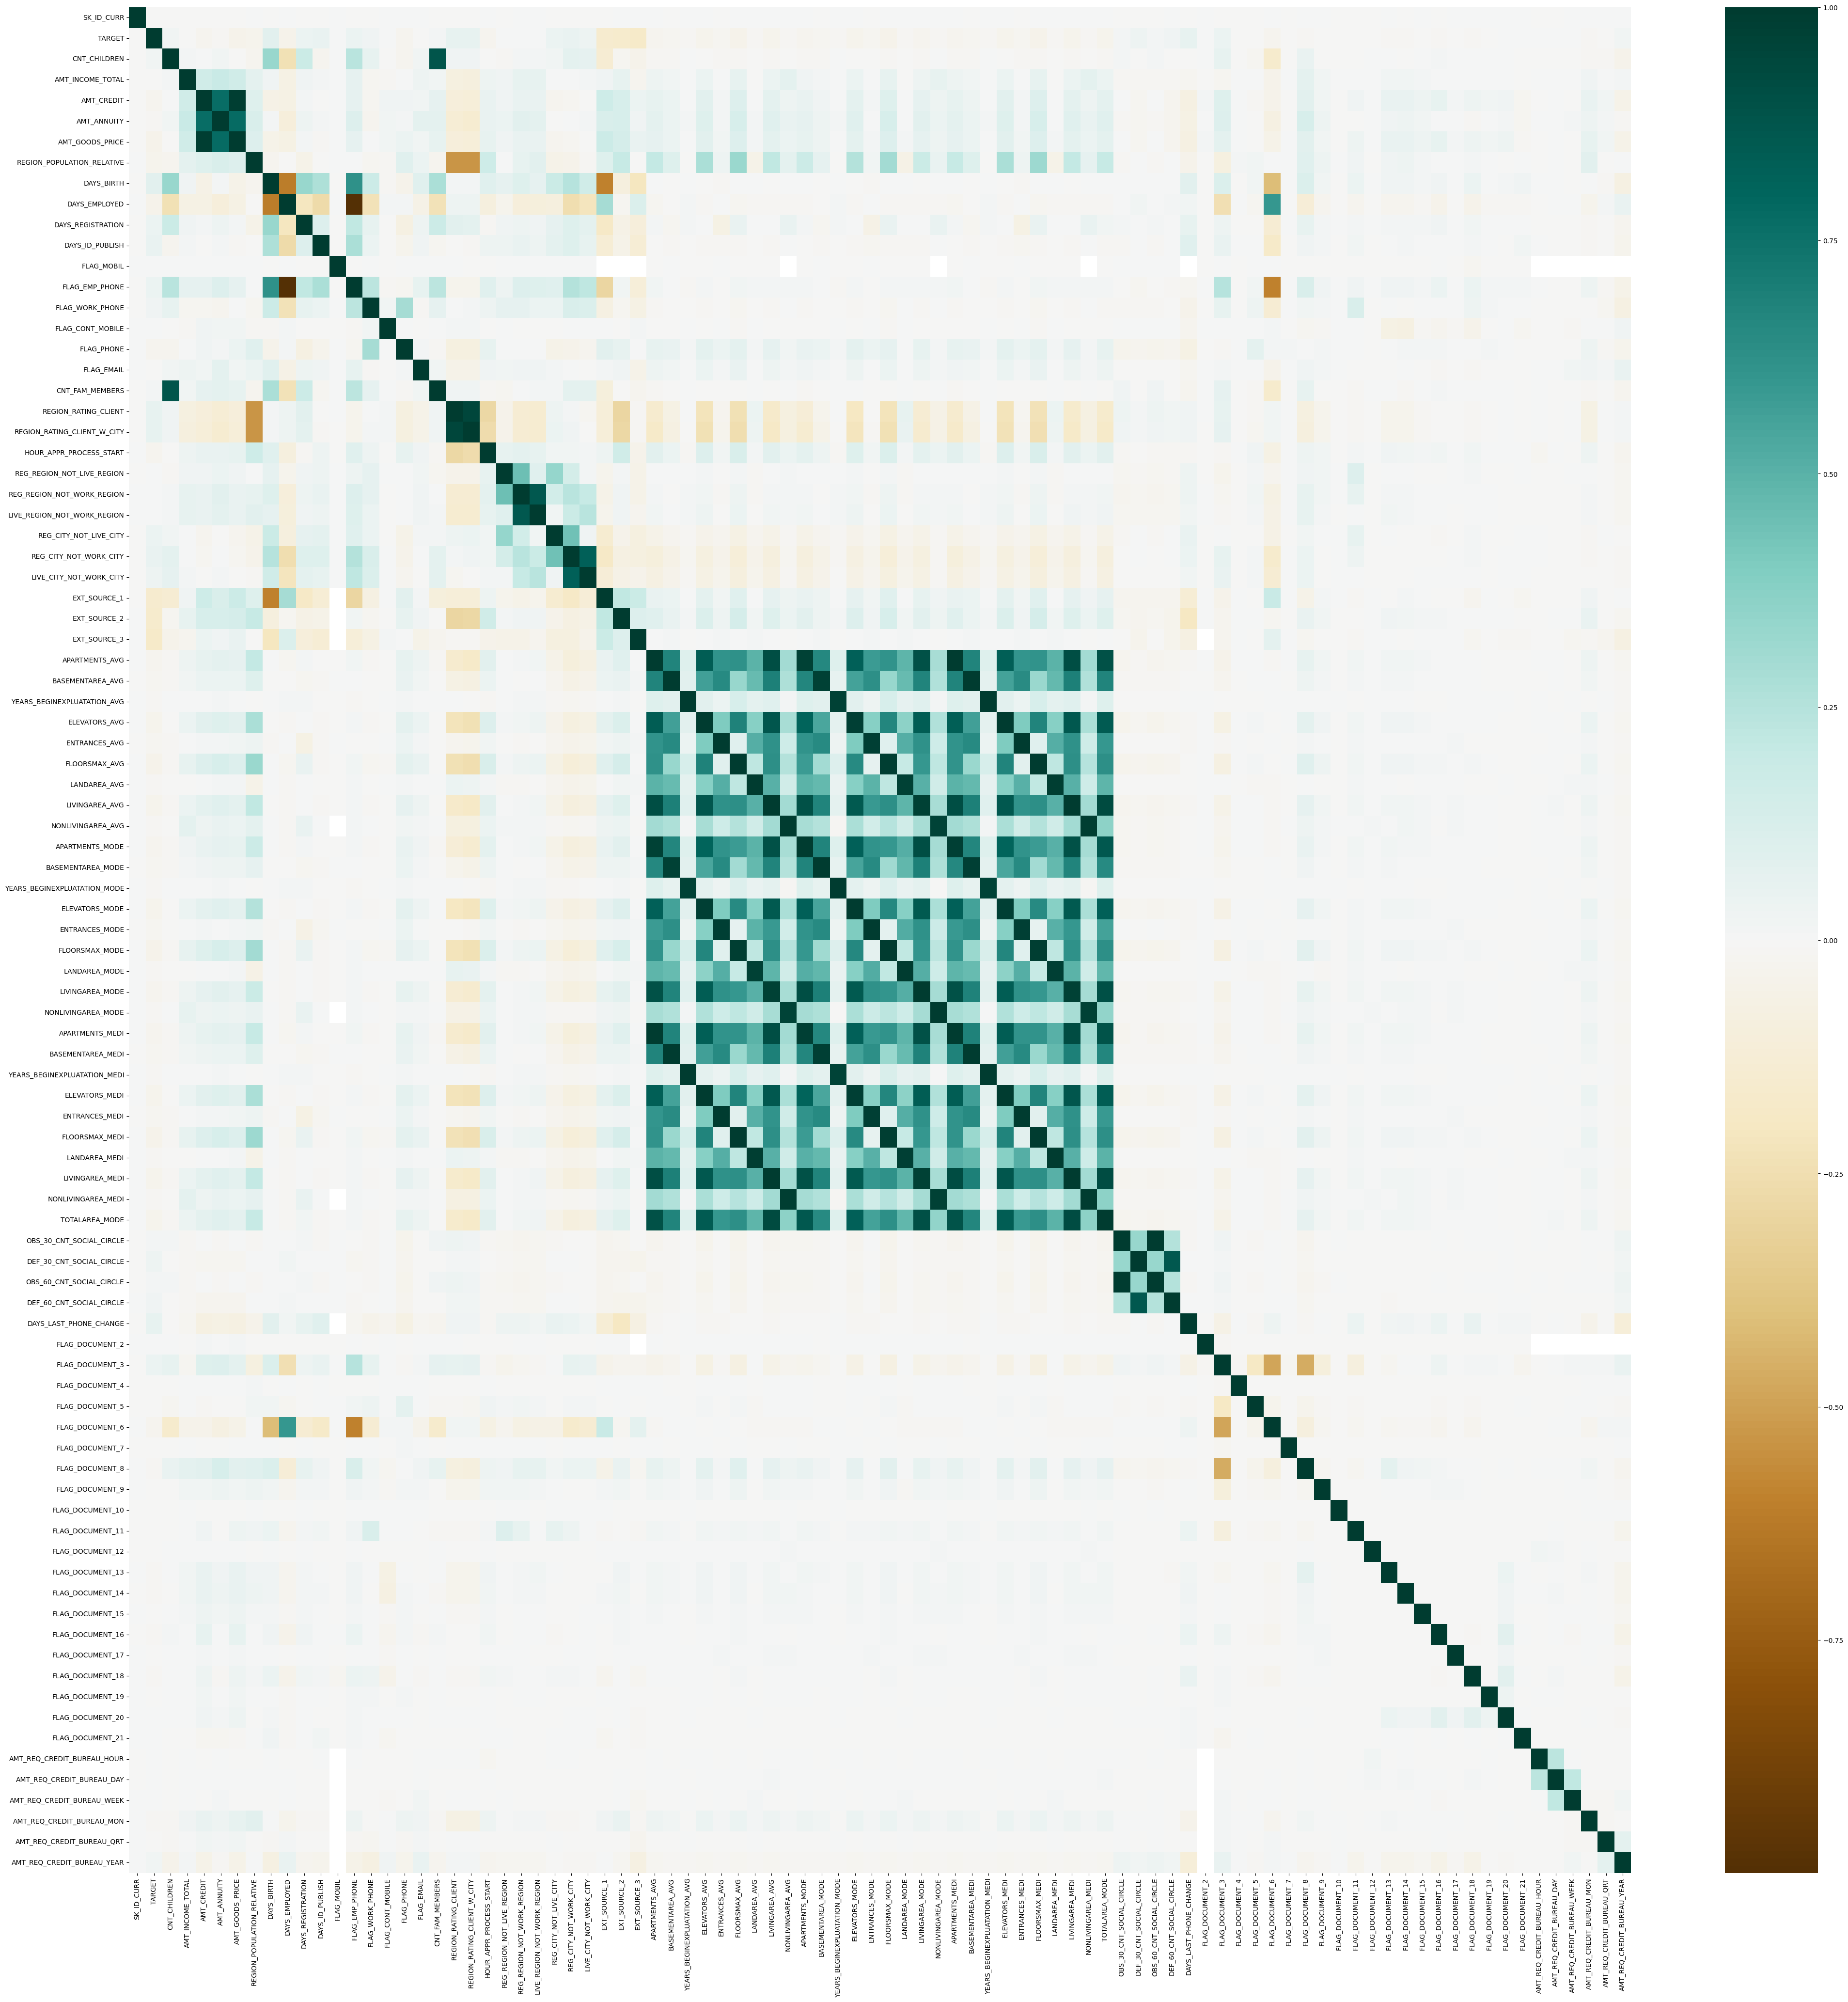

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(df[num_cols].corr(), cmap='BrBG')

### AMT_ANNUITY

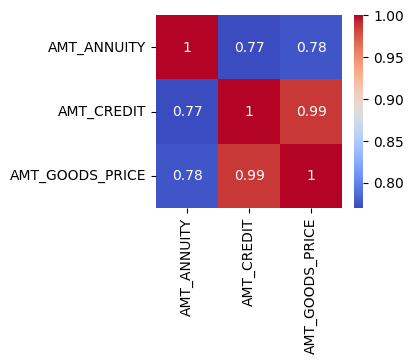

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data_train = df[df['AMT_GOODS_PRICE'].notnull() & df['AMT_ANNUITY'].notnull()][['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY']]
data_test = df[df['AMT_GOODS_PRICE'].notnull() & df['AMT_ANNUITY'].isnull()][['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307221 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AMT_GOODS_PRICE  307221 non-null  float64
 1   AMT_CREDIT       307221 non-null  float64
 2   AMT_ANNUITY      307221 non-null  float64
dtypes: float64(3)
memory usage: 9.4 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 47531 to 241835
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AMT_GOODS_PRICE  12 non-null     float64
 1   AMT_CREDIT       12 non-null     float64
 2   AMT_ANNUITY      0 non-null      float64
dtypes: float64(3)
memory usage: 384.0 bytes


In [ ]:
X = data_train[['AMT_GOODS_PRICE', 'AMT_CREDIT']]
y = data_train['AMT_ANNUITY']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 6472.488586933058
Root Mean Squared Error (RMSE): 9047.16825257306
Mean Absolute Percentage Error (MAPE): 28.26009542467018
R-squared (R^2): 0.6098735880595706


In [ ]:
data_test['AMT_ANNUITY'] = model.predict(data_test[['AMT_GOODS_PRICE', 'AMT_CREDIT']])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 47531 to 241835
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AMT_GOODS_PRICE  12 non-null     float64
 1   AMT_CREDIT       12 non-null     float64
 2   AMT_ANNUITY      12 non-null     float64
dtypes: float64(3)
memory usage: 384.0 bytes


In [ ]:
df.loc[df['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY'] = data_test.loc[df['AMT_ANNUITY'].isnull(), 'AMT_ANNUITY']

In [ ]:
print('Total Missing Values')
for i in ['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']:
    print('  '+i+': '+str(df[i].isnull().sum()))

Total Missing Values
  AMT_ANNUITY: 0
  AMT_CREDIT: 0
  AMT_GOODS_PRICE: 278


### AMT_GOODS_PRICE

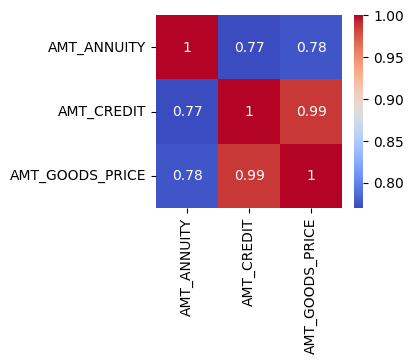

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
data_train = df[df['AMT_GOODS_PRICE'].notnull()][['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY']]
data_test = df[df['AMT_GOODS_PRICE'].isnull()][['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307233 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   AMT_GOODS_PRICE  307233 non-null  float64
 1   AMT_CREDIT       307233 non-null  float64
 2   AMT_ANNUITY      307233 non-null  float64
dtypes: float64(3)
memory usage: 9.4 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 724 to 306273
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AMT_GOODS_PRICE  0 non-null      float64
 1   AMT_CREDIT       278 non-null    float64
 2   AMT_ANNUITY      278 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [ ]:
X = data_train[['AMT_CREDIT', 'AMT_ANNUITY']]
y = data_train['AMT_GOODS_PRICE']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 42707.22094365212
Root Mean Squared Error (RMSE): 58251.88648572777
Mean Absolute Percentage Error (MAPE): 9.025207546031726
R-squared (R^2): 0.975178548635403


In [ ]:
data_test['AMT_GOODS_PRICE'] = model.predict(data_test[['AMT_CREDIT', 'AMT_ANNUITY']])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 724 to 306273
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AMT_GOODS_PRICE  278 non-null    float64
 1   AMT_CREDIT       278 non-null    float64
 2   AMT_ANNUITY      278 non-null    float64
dtypes: float64(3)
memory usage: 8.7 KB


In [ ]:
df.loc[df['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = data_test.loc[df['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE']

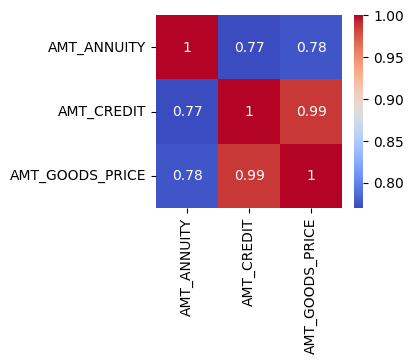

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE']].corr(), annot=True, cmap='coolwarm')
plt.show()

### CNT_FAM_MEMBERS

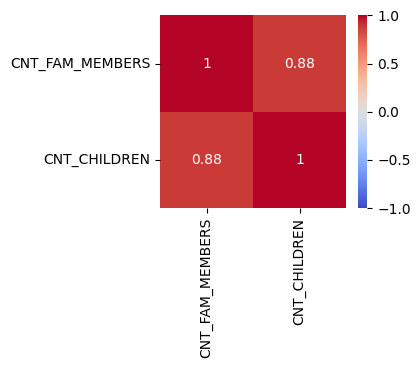

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['CNT_FAM_MEMBERS', 'CNT_CHILDREN']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['CNT_FAM_MEMBERS'].notnull()][['CNT_CHILDREN', 'CNT_FAM_MEMBERS']]
data_test = df[df['CNT_FAM_MEMBERS'].isnull()][['CNT_CHILDREN', 'CNT_FAM_MEMBERS']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307509 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CNT_CHILDREN     307509 non-null  int64  
 1   CNT_FAM_MEMBERS  307509 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 7.0 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 41982 to 187348
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CNT_CHILDREN     2 non-null      int64  
 1   CNT_FAM_MEMBERS  0 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 48.0 bytes


In [ ]:
X = data_train[['CNT_CHILDREN']]
y = data_train['CNT_FAM_MEMBERS']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = np.round(model.predict(X_val))

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.26202399921953756
Root Mean Squared Error (RMSE): 0.5120415955348433
Mean Absolute Percentage Error (MAPE): 23.894053580913354
R-squared (R^2): 0.6862132056046397


In [ ]:
data_test['CNT_FAM_MEMBERS'] = np.round(model.predict(data_test[['CNT_CHILDREN']]))

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 41982 to 187348
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CNT_CHILDREN     2 non-null      int64  
 1   CNT_FAM_MEMBERS  2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 48.0 bytes


In [ ]:
df.loc[df['CNT_FAM_MEMBERS'].isnull(), 'CNT_FAM_MEMBERS'] = data_test.loc[df['CNT_FAM_MEMBERS'].isnull(), 'CNT_FAM_MEMBERS']

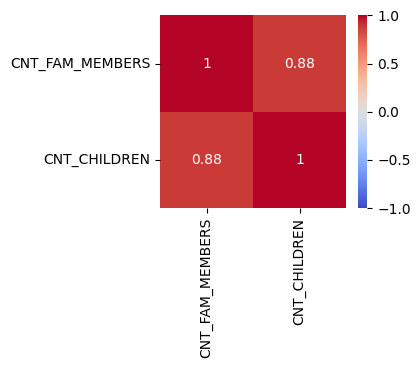

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['CNT_FAM_MEMBERS', 'CNT_CHILDREN']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

### DAYS_LAST_PHONE_CHANGE

In [ ]:
df['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [ ]:
len(df)

307511

In [ ]:
df = df.dropna(subset=['DAYS_LAST_PHONE_CHANGE'])

In [ ]:
len(df)

307510

### OBS_30_CNT_SOCIAL_CIRCLE

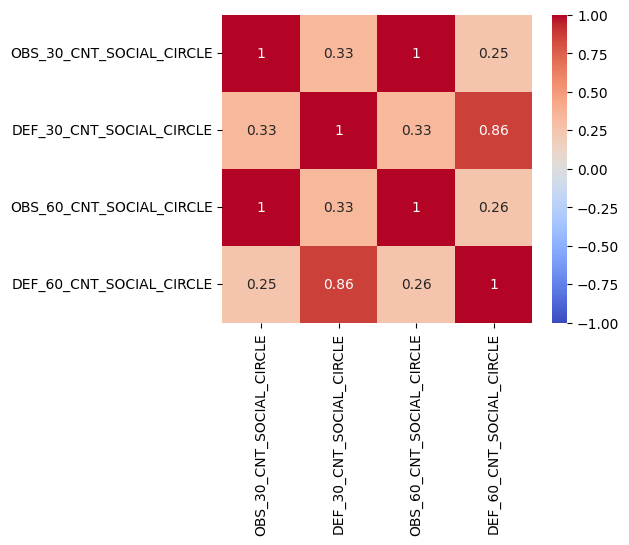

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
df[['OBS_30_CNT_SOCIAL_CIRCLE', 'SK_ID_CURR']].groupby(['OBS_30_CNT_SOCIAL_CIRCLE']).count()

SK_ID_CURR
OBS_30_CNT_SOCIAL_CIRCLE            
0.0                           163909
1.0                            48783
2.0                            29808
3.0                            20322
4.0                            14143
5.0                             9553
6.0                             6453
7.0                             4390
8.0                             2967
9.0                             2003
10.0                            1376
11.0                             852
12.0                             652
13.0                             411
14.0                             258
15.0                             166
16.0                             133
17.0                              88
18.0                              46
19.0                              44
20.0                              30
21.0                              29
22.0                              22
23.0                              15
24.0                              11
25.0                              11
26.0                               3
27.0                               5
28.0                               1
29.0                               1
30.0                               2
47.0                               1
348.0                              1

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median())

### OBS_60_CNT_SOCIAL_CIRCLE

In [ ]:
data_train = df[df['OBS_30_CNT_SOCIAL_CIRCLE'].notnull() & df['OBS_60_CNT_SOCIAL_CIRCLE'].notnull()][['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]
data_test = df[df['OBS_30_CNT_SOCIAL_CIRCLE'].notnull() & df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()][['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]

In [ ]:
X = data_train[['OBS_30_CNT_SOCIAL_CIRCLE']]
y = data_train['OBS_60_CNT_SOCIAL_CIRCLE']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
data_test['OBS_60_CNT_SOCIAL_CIRCLE'] = model.predict(data_test[['OBS_30_CNT_SOCIAL_CIRCLE']])

In [ ]:
df.loc[df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(), 'OBS_60_CNT_SOCIAL_CIRCLE'] = data_test.loc[df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(), 'OBS_60_CNT_SOCIAL_CIRCLE']

### DEF_30_CNT_SOCIAL_CIRCLE

In [ ]:
data_train = df[df['DEF_30_CNT_SOCIAL_CIRCLE'].notnull()][['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']]
data_test = df[df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()][['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']]

In [ ]:
X = data_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]
y = data_train['DEF_30_CNT_SOCIAL_CIRCLE']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
data_test['DEF_30_CNT_SOCIAL_CIRCLE'] = model.predict(data_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']])

In [ ]:
df.loc[df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(), 'DEF_30_CNT_SOCIAL_CIRCLE'] = data_test.loc[df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(), 'DEF_30_CNT_SOCIAL_CIRCLE']

### DEF_60_CNT_SOCIAL_CIRCLE

In [ ]:
data_train = df[df['DEF_60_CNT_SOCIAL_CIRCLE'].notnull()][['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]
data_test = df[df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()][['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']]

In [ ]:
X = data_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']]
y = data_train['DEF_60_CNT_SOCIAL_CIRCLE']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
data_test['DEF_60_CNT_SOCIAL_CIRCLE'] = model.predict(data_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']])

In [ ]:
df.loc[df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(), 'DEF_60_CNT_SOCIAL_CIRCLE'] = data_test.loc[df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(), 'DEF_60_CNT_SOCIAL_CIRCLE']

### AMT_REQ_CREDIT_BUREAU_HOUR/DAY/WEEK/MON/QRT/YEAR

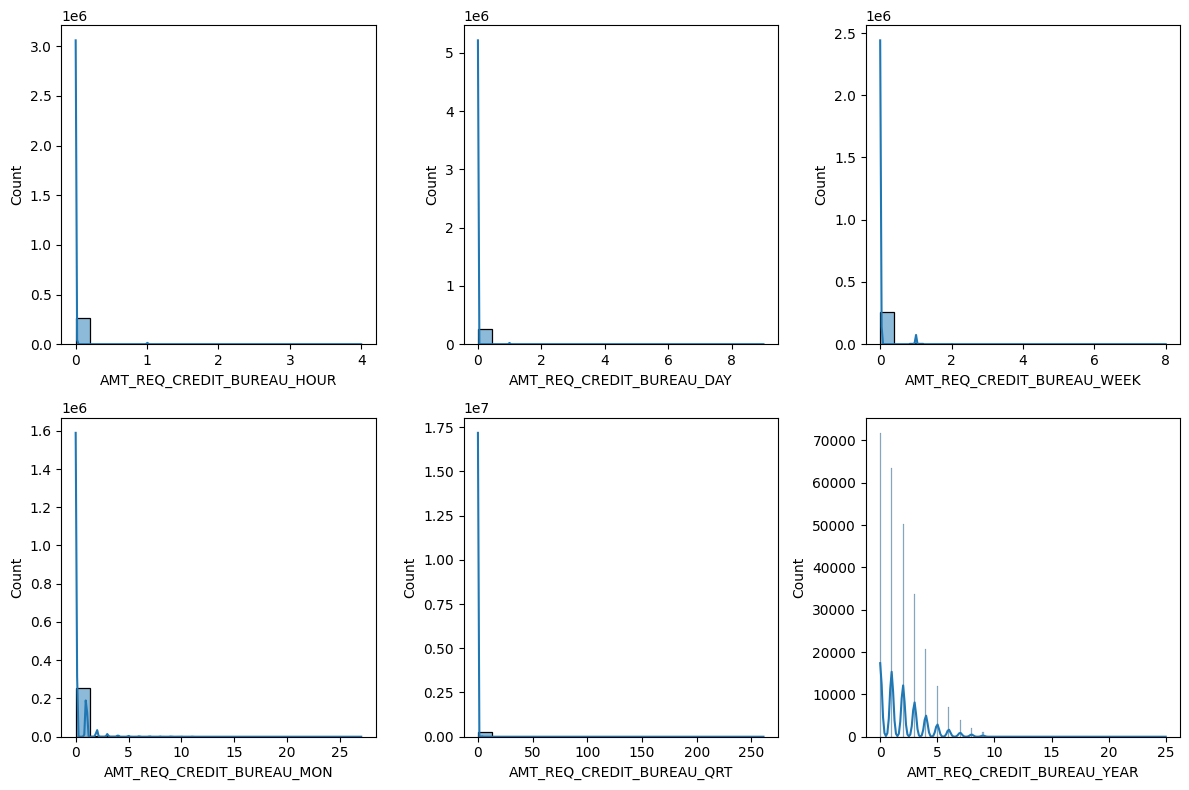

In [ ]:
plt.figure(figsize=(12, 8))

kolom = ['AMT_REQ_CREDIT_BUREAU_HOUR',
         'AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK',
         'AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR']

for i, col in enumerate(kolom):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
df['AMT_REQ_CREDIT_BUREAU_DAY'] = df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)
df['AMT_REQ_CREDIT_BUREAU_MON'] = df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

### EXT_SOURCE_1

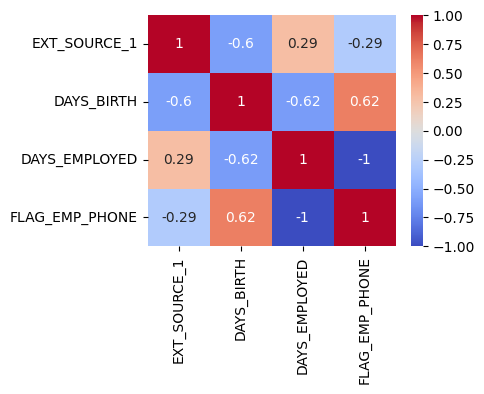

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['EXT_SOURCE_1'].notnull()][['EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']]
data_test = df[df['EXT_SOURCE_1'].isnull()][['EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']]

In [ ]:
X = data_train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']]
y = data_train['EXT_SOURCE_1']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.13693256620524
Root Mean Squared Error (RMSE): 0.1691403819689944
Mean Absolute Percentage Error (MAPE): 43.905487484837295
R-squared (R^2): 0.36212398980361193


In [ ]:
data_test['EXT_SOURCE_1'] = model.predict(data_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173377 entries, 2 to 307509
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   EXT_SOURCE_1    173377 non-null  float64
 1   DAYS_BIRTH      173377 non-null  int64  
 2   DAYS_EMPLOYED   173377 non-null  int64  
 3   FLAG_EMP_PHONE  173377 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 6.6 MB


In [ ]:
df.loc[df['EXT_SOURCE_1'].isnull(), 'EXT_SOURCE_1'] = data_test.loc[df['EXT_SOURCE_1'].isnull(), 'EXT_SOURCE_1']

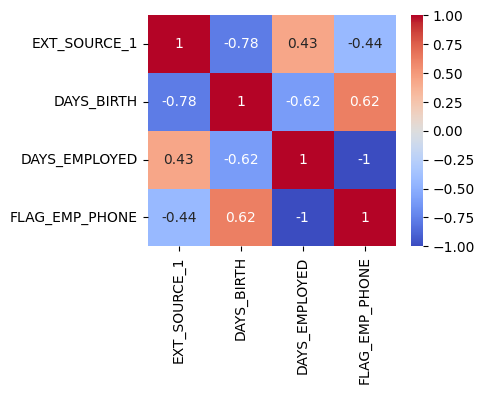

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

### EXT_SOURCE_2

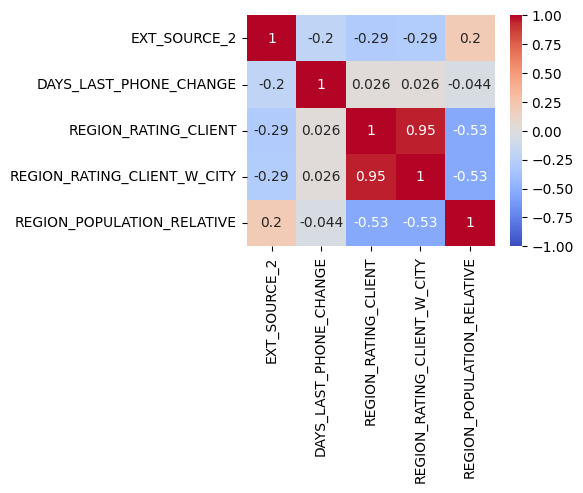

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['EXT_SOURCE_2'].notnull()][['EXT_SOURCE_2', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE']]
data_test = df[df['EXT_SOURCE_2'].isnull()][['EXT_SOURCE_2', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE']]

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659 entries, 329 to 307387
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EXT_SOURCE_2                 0 non-null      float64
 1   REGION_RATING_CLIENT         659 non-null    int64  
 2   REGION_RATING_CLIENT_W_CITY  659 non-null    int64  
 3   DAYS_LAST_PHONE_CHANGE       659 non-null    float64
 4   REGION_POPULATION_RELATIVE   659 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 30.9 KB


In [ ]:
X = data_train[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE']]
y = data_train['EXT_SOURCE_2']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.14410275617794477
Root Mean Squared Error (RMSE): 0.1785308094680227
Mean Absolute Percentage Error (MAPE): 342.00952279740613
R-squared (R^2): 0.12619101989752912


In [ ]:
data_test['EXT_SOURCE_2'] = model.predict(data_test[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE']])

In [ ]:
df.loc[df['EXT_SOURCE_2'].isnull(), 'EXT_SOURCE_2'] = data_test.loc[df['EXT_SOURCE_2'].isnull(), 'EXT_SOURCE_2']

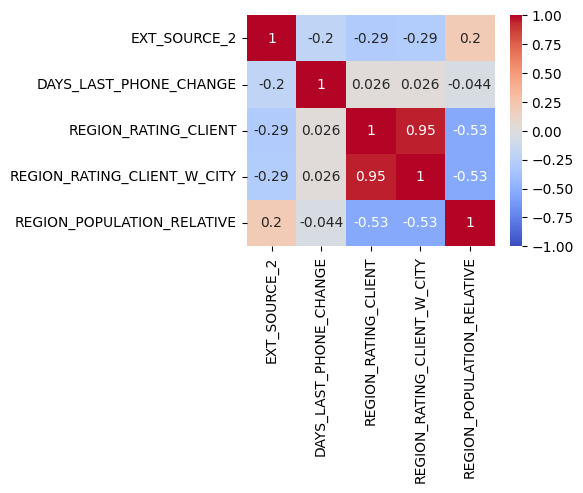

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['EXT_SOURCE_2', 'DAYS_LAST_PHONE_CHANGE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

### EXT_SOURCE_3

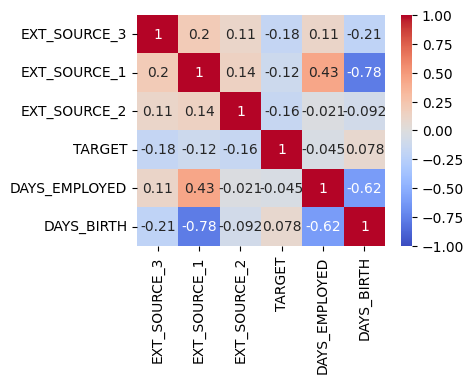

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['EXT_SOURCE_3'].notnull()][['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
data_test = df[df['EXT_SOURCE_3'].isnull()][['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246546 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   EXT_SOURCE_3   246546 non-null  float64
 1   EXT_SOURCE_1   246546 non-null  float64
 2   EXT_SOURCE_2   246546 non-null  float64
 3   TARGET         246546 non-null  int64  
 4   DAYS_EMPLOYED  246546 non-null  int64  
 5   DAYS_BIRTH     246546 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 13.2 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60964 entries, 1 to 307507
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   EXT_SOURCE_3   0 non-null      float64
 1   EXT_SOURCE_1   60964 non-null  float64
 2   EXT_SOURCE_2   60964 non-null  float64
 3   TARGET         60964 non-null  int64  
 4   DAYS_EMPLOYED  60964 non-null  int64  
 5   DAYS_BIRTH     60964 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 3.3 MB


In [ ]:
X = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
y = data_train['EXT_SOURCE_3']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.15517671398684746
Root Mean Squared Error (RMSE): 0.1869443505780058
Mean Absolute Percentage Error (MAPE): 370.1391946991505
R-squared (R^2): 0.07738491237441414


In [ ]:
data_test['EXT_SOURCE_3'] = model.predict(data_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']])

In [ ]:
df.loc[df['EXT_SOURCE_3'].isnull(), 'EXT_SOURCE_3'] = data_test.loc[df['EXT_SOURCE_3'].isnull(), 'EXT_SOURCE_3']

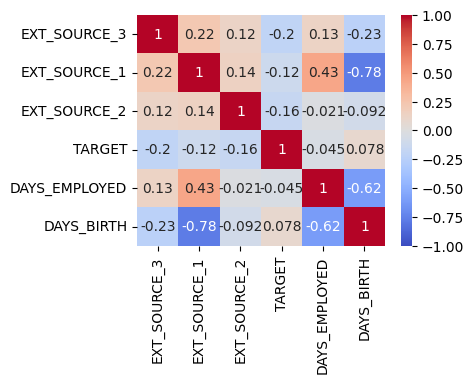

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(df[['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'TARGET', 'DAYS_EMPLOYED', 'DAYS_BIRTH']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

### YEARS_BEGINEXPLUATATION_AVG

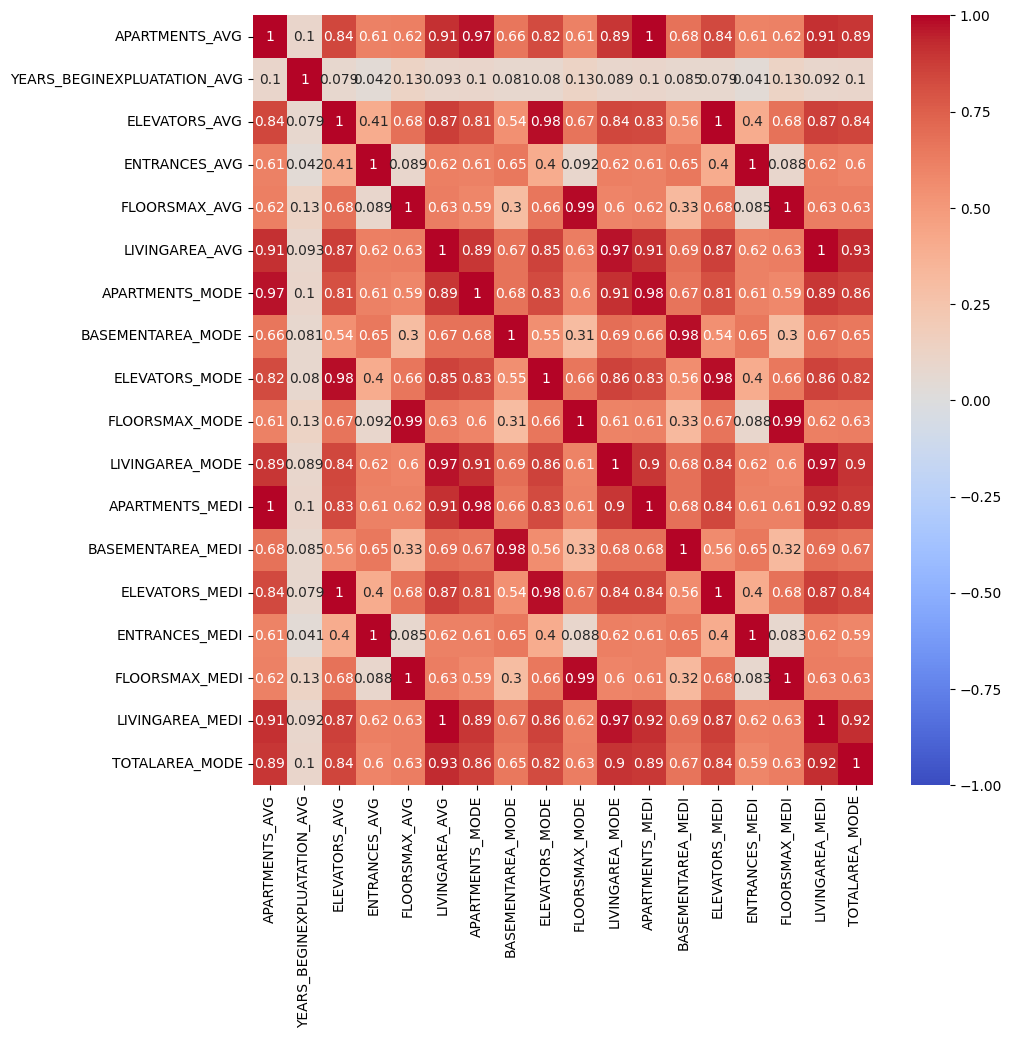

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df[['APARTMENTS_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

<Axes: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Count'>

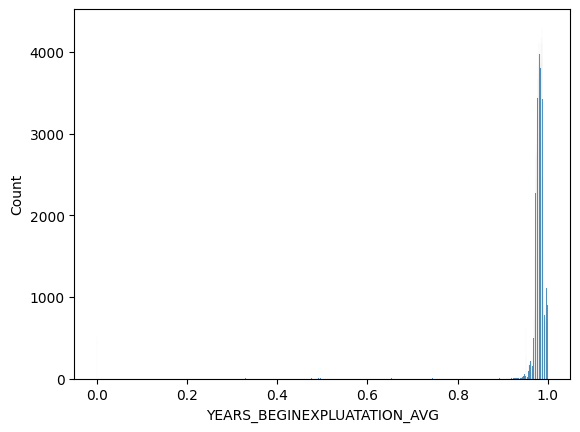

In [ ]:
sns.histplot(data=df, x='YEARS_BEGINEXPLUATATION_AVG')

In [ ]:
value_ratios = df['YEARS_BEGINEXPLUATATION_AVG'].value_counts(normalize=True)

missing_values = df['YEARS_BEGINEXPLUATATION_AVG'].isnull()
num_missing_values = missing_values.sum()

imputed_values = np.random.choice(value_ratios.index, size=num_missing_values, p=value_ratios.values)

df.loc[missing_values, 'YEARS_BEGINEXPLUATATION_AVG'] = imputed_values

<Axes: xlabel='YEARS_BEGINEXPLUATATION_AVG', ylabel='Count'>

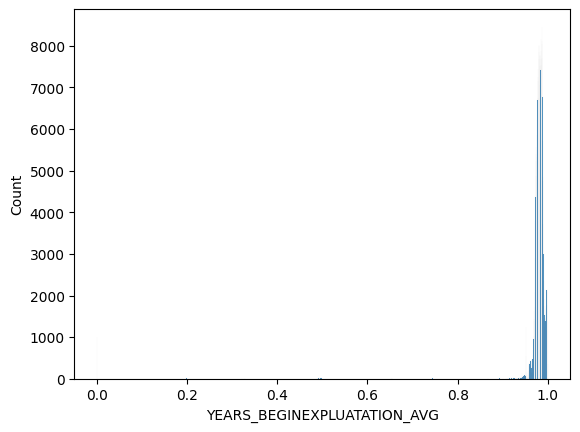

In [ ]:
sns.histplot(data=df, x='YEARS_BEGINEXPLUATATION_AVG')

### YEARS_BEGINEXPLUATATION_MODE

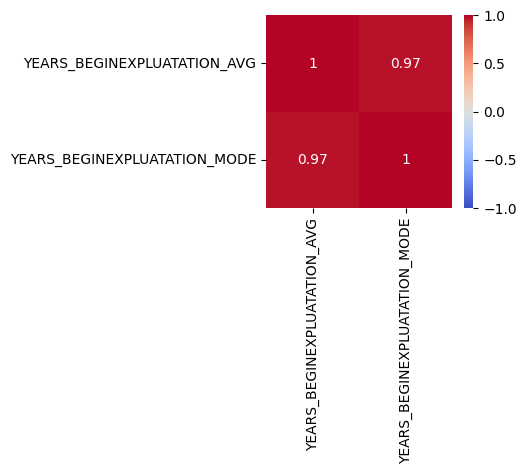

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['YEARS_BEGINEXPLUATATION_MODE'].notnull()][['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']]
data_test = df[df['YEARS_BEGINEXPLUATATION_MODE'].isnull()][['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157503 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_AVG   157503 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  157503 non-null  float64
dtypes: float64(2)
memory usage: 3.6 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150007 entries, 2 to 307504
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_AVG   150007 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  0 non-null       float64
dtypes: float64(2)
memory usage: 3.4 MB


In [ ]:
X = data_train[['YEARS_BEGINEXPLUATATION_AVG']]
y = data_train['YEARS_BEGINEXPLUATATION_MODE']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.0015655757202702768
Root Mean Squared Error (RMSE): 0.017578923054278647
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9382814611200846


In [ ]:
data_test['YEARS_BEGINEXPLUATATION_MODE'] = model.predict(data_test[['YEARS_BEGINEXPLUATATION_AVG']])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150007 entries, 2 to 307504
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_AVG   150007 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  150007 non-null  float64
dtypes: float64(2)
memory usage: 3.4 MB


In [ ]:
df.loc[df['YEARS_BEGINEXPLUATATION_MODE'].isnull(), 'YEARS_BEGINEXPLUATATION_MODE'] = data_test.loc[df['YEARS_BEGINEXPLUATATION_MODE'].isnull(), 'YEARS_BEGINEXPLUATATION_MODE']

### YEARS_BEGINEXPLUATATION_MEDI

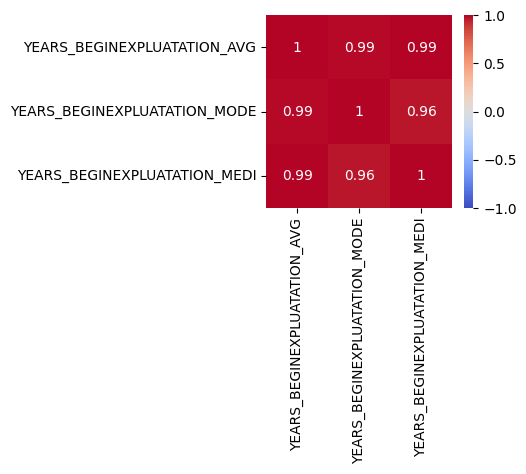

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['YEARS_BEGINEXPLUATATION_MEDI'].notnull()][['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']]
data_test = df[df['YEARS_BEGINEXPLUATATION_MEDI'].isnull()][['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157503 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_AVG   157503 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  157503 non-null  float64
 2   YEARS_BEGINEXPLUATATION_MEDI  157503 non-null  float64
dtypes: float64(3)
memory usage: 4.8 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150007 entries, 2 to 307504
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_AVG   150007 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  150007 non-null  float64
 2   YEARS_BEGINEXPLUATATION_MEDI  0 non-null       float64
dtypes: float64(3)
memory usage: 4.6 MB


In [ ]:
X = data_train[['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']]
y = data_train['YEARS_BEGINEXPLUATATION_MEDI']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.0003087437172540117
Root Mean Squared Error (RMSE): 0.00690252786200332
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9886956950399185


In [ ]:
data_test['YEARS_BEGINEXPLUATATION_MEDI'] = model.predict(data_test[['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150007 entries, 2 to 307504
Data columns (total 3 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   YEARS_BEGINEXPLUATATION_AVG   150007 non-null  float64
 1   YEARS_BEGINEXPLUATATION_MODE  150007 non-null  float64
 2   YEARS_BEGINEXPLUATATION_MEDI  150007 non-null  float64
dtypes: float64(3)
memory usage: 4.6 MB


In [ ]:
df.loc[df['YEARS_BEGINEXPLUATATION_MEDI'].isnull(), 'YEARS_BEGINEXPLUATATION_MEDI'] = data_test.loc[df['YEARS_BEGINEXPLUATATION_MEDI'].isnull(), 'YEARS_BEGINEXPLUATATION_MEDI']

### TOTALAREA_MODE

<Axes: xlabel='TOTALAREA_MODE', ylabel='Count'>

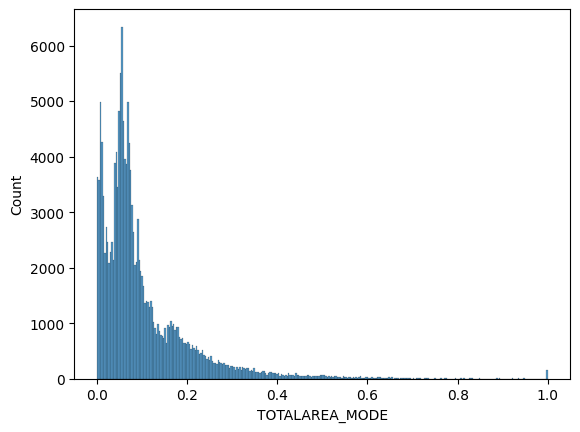

In [ ]:
sns.histplot(data=df, x='TOTALAREA_MODE')

In [ ]:
value_ratios = df['TOTALAREA_MODE'].value_counts(normalize=True)

missing_values = df['TOTALAREA_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_values = np.random.choice(value_ratios.index, size=num_missing_values, p=value_ratios.values)

df.loc[missing_values, 'TOTALAREA_MODE'] = imputed_values

<Axes: xlabel='TOTALAREA_MODE', ylabel='Count'>

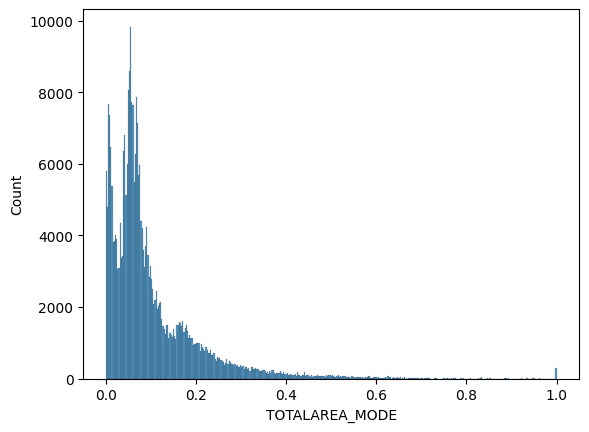

In [ ]:
sns.histplot(data=df, x='TOTALAREA_MODE')

### FLOORSMAX_AVG

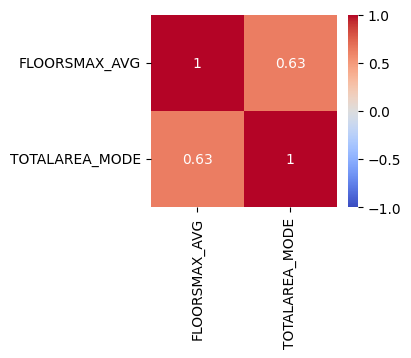

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['FLOORSMAX_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['FLOORSMAX_AVG'].notnull()][['FLOORSMAX_AVG', 'TOTALAREA_MODE']]
data_test = df[df['FLOORSMAX_AVG'].isnull()][['FLOORSMAX_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154490 entries, 0 to 307510
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FLOORSMAX_AVG   154490 non-null  float64
 1   TOTALAREA_MODE  154490 non-null  float64
dtypes: float64(2)
memory usage: 3.5 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153020 entries, 2 to 307504
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FLOORSMAX_AVG   0 non-null       float64
 1   TOTALAREA_MODE  153020 non-null  float64
dtypes: float64(2)
memory usage: 3.5 MB


In [ ]:
X = data_train[['TOTALAREA_MODE']]
y = data_train['FLOORSMAX_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.07934551366925585
Root Mean Squared Error (RMSE): 0.11198195134989189
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.4038026225319372


In [ ]:
data_test['FLOORSMAX_AVG'] = model.predict(data_test[['TOTALAREA_MODE']])

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153020 entries, 2 to 307504
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FLOORSMAX_AVG   153020 non-null  float64
 1   TOTALAREA_MODE  153020 non-null  float64
dtypes: float64(2)
memory usage: 3.5 MB


In [ ]:
df.loc[df['FLOORSMAX_AVG'].isnull(), 'FLOORSMAX_AVG'] = data_test.loc[df['FLOORSMAX_AVG'].isnull(), 'FLOORSMAX_AVG']

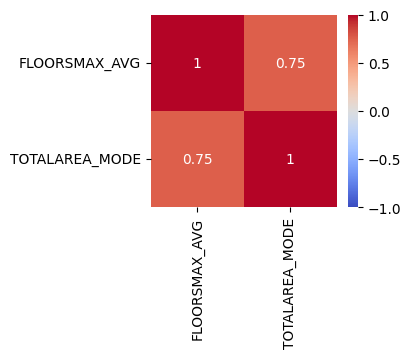

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['FLOORSMAX_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

### APARTMENTS_AVG

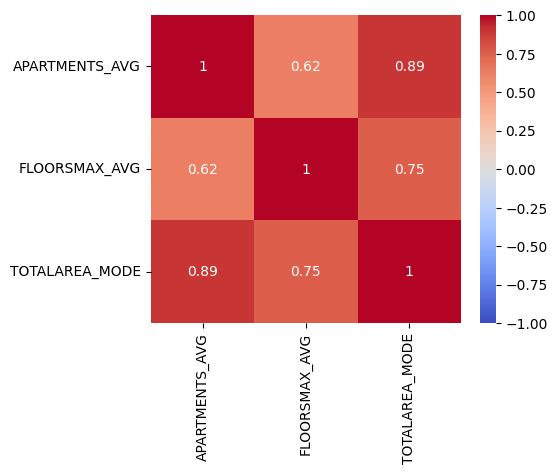

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['APARTMENTS_AVG'].notnull()][['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]
data_test = df[df['APARTMENTS_AVG'].isnull()][['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151449 entries, 0 to 307510
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   APARTMENTS_AVG  151449 non-null  float64
 1   FLOORSMAX_AVG   151449 non-null  float64
 2   TOTALAREA_MODE  151449 non-null  float64
dtypes: float64(3)
memory usage: 4.6 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156061 entries, 2 to 307504
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   APARTMENTS_AVG  0 non-null       float64
 1   FLOORSMAX_AVG   156061 non-null  float64
 2   TOTALAREA_MODE  156061 non-null  float64
dtypes: float64(3)
memory usage: 4.8 MB


In [ ]:
X = data_train[['FLOORSMAX_AVG', 'TOTALAREA_MODE']]
y = data_train['APARTMENTS_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.027156896133111477
Root Mean Squared Error (RMSE): 0.04925155428385208
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.7958286033132542


In [ ]:
data_test['APARTMENTS_AVG'] = model.predict(data_test[['FLOORSMAX_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['APARTMENTS_AVG'].isnull(), 'APARTMENTS_AVG'] = data_test.loc[df['APARTMENTS_AVG'].isnull(), 'APARTMENTS_AVG']

### LIVINGAREA_AVG

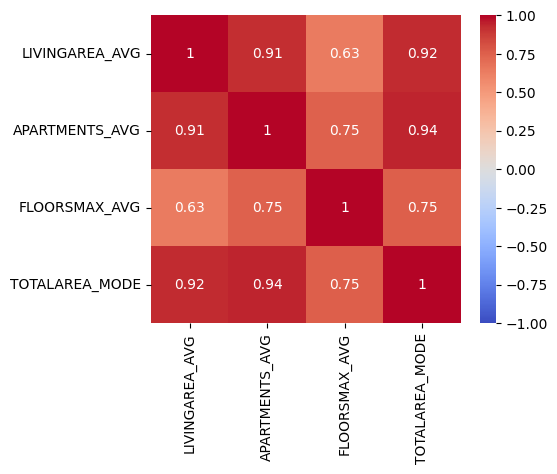

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['LIVINGAREA_AVG'].notnull()][['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]
data_test = df[df['LIVINGAREA_AVG'].isnull()][['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153160 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LIVINGAREA_AVG  153160 non-null  float64
 1   APARTMENTS_AVG  153160 non-null  float64
 2   FLOORSMAX_AVG   153160 non-null  float64
 3   TOTALAREA_MODE  153160 non-null  float64
dtypes: float64(4)
memory usage: 5.8 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154350 entries, 2 to 307504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LIVINGAREA_AVG  0 non-null       float64
 1   APARTMENTS_AVG  154350 non-null  float64
 2   FLOORSMAX_AVG   154350 non-null  float64
 3   TOTALAREA_MODE  154350 non-null  float64
dtypes: float64(4)
memory usage: 5.9 MB


In [ ]:
X = data_train[['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]
y = data_train['LIVINGAREA_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.017990293828289088
Root Mean Squared Error (RMSE): 0.037484357252617125
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.8871566628726784


In [ ]:
data_test['LIVINGAREA_AVG'] = model.predict(data_test[['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['LIVINGAREA_AVG'].isnull(), 'LIVINGAREA_AVG'] = data_test.loc[df['LIVINGAREA_AVG'].isnull(), 'LIVINGAREA_AVG']

### ENTRANCES_AVG

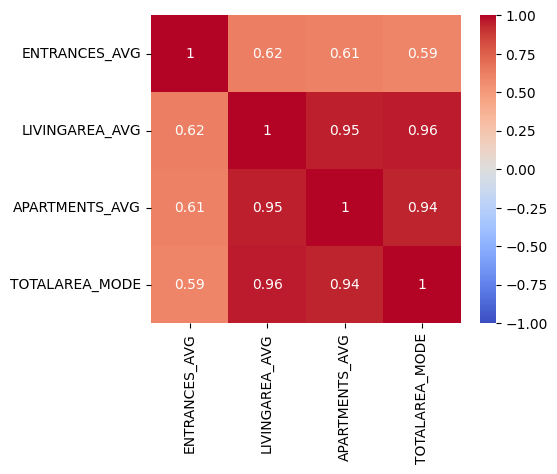

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['ENTRANCES_AVG'].notnull()][['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['ENTRANCES_AVG'].isnull()][['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152682 entries, 0 to 307510
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ENTRANCES_AVG   152682 non-null  float64
 1   LIVINGAREA_AVG  152682 non-null  float64
 2   APARTMENTS_AVG  152682 non-null  float64
 3   TOTALAREA_MODE  152682 non-null  float64
dtypes: float64(4)
memory usage: 5.8 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154828 entries, 2 to 307504
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ENTRANCES_AVG   0 non-null       float64
 1   LIVINGAREA_AVG  154828 non-null  float64
 2   APARTMENTS_AVG  154828 non-null  float64
 3   TOTALAREA_MODE  154828 non-null  float64
dtypes: float64(4)
memory usage: 5.9 MB


In [ ]:
X = data_train[['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['ENTRANCES_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.054015228878963886
Root Mean Squared Error (RMSE): 0.07803949668330801
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.3990481143974869


In [ ]:
data_test['ENTRANCES_AVG'] = model.predict(data_test[['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['ENTRANCES_AVG'].isnull(), 'ENTRANCES_AVG'] = data_test.loc[df['ENTRANCES_AVG'].isnull(), 'ENTRANCES_AVG']

### ELEVATORS_AVG

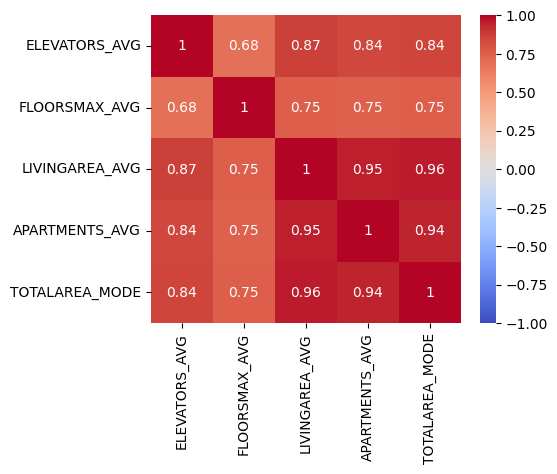

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['ELEVATORS_AVG'].notnull()][['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['ELEVATORS_AVG'].isnull()][['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143619 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ELEVATORS_AVG   143619 non-null  float64
 1   FLOORSMAX_AVG   143619 non-null  float64
 2   LIVINGAREA_AVG  143619 non-null  float64
 3   APARTMENTS_AVG  143619 non-null  float64
 4   TOTALAREA_MODE  143619 non-null  float64
dtypes: float64(5)
memory usage: 6.6 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163891 entries, 2 to 307509
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ELEVATORS_AVG   0 non-null       float64
 1   FLOORSMAX_AVG   163891 non-null  float64
 2   LIVINGAREA_AVG  163891 non-null  float64
 3   APARTMENTS_AVG  163891 non-null  float64
 4   TOTALAREA_MODE  163891 non-null  float64
dtypes: float64(5)
memory usage: 7.5 MB


In [ ]:
X = data_train[['FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['ELEVATORS_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.041764895324027065
Root Mean Squared Error (RMSE): 0.0609107955326656
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.7939787654616484


In [ ]:
data_test['ELEVATORS_AVG'] = model.predict(data_test[['FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['ELEVATORS_AVG'].isnull(), 'ELEVATORS_AVG'] = data_test.loc[df['ELEVATORS_AVG'].isnull(), 'ELEVATORS_AVG']

### NONLIVINGAREA_AVG

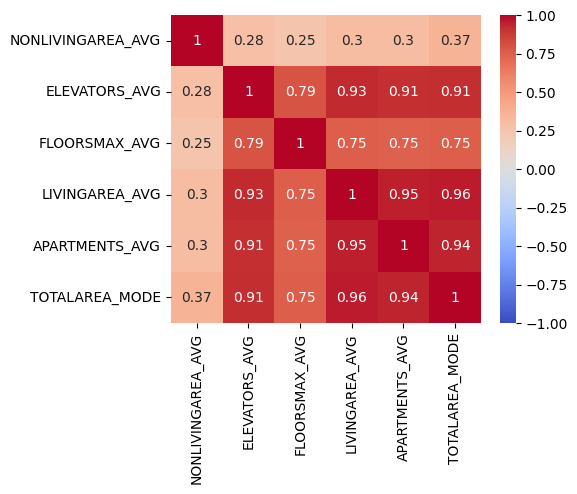

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['NONLIVINGAREA_AVG'].notnull()][['NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['NONLIVINGAREA_AVG'].isnull()][['NONLIVINGAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137829 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NONLIVINGAREA_AVG  137829 non-null  float64
 1   ELEVATORS_AVG      137829 non-null  float64
 2   FLOORSMAX_AVG      137829 non-null  float64
 3   LIVINGAREA_AVG     137829 non-null  float64
 4   APARTMENTS_AVG     137829 non-null  float64
 5   TOTALAREA_MODE     137829 non-null  float64
dtypes: float64(6)
memory usage: 7.4 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169681 entries, 2 to 307509
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   NONLIVINGAREA_AVG  0 non-null       float64
 1   ELEVATORS_AVG      169681 non-null  float64
 2   FLOORSMAX_AVG      169681 non-null  float64
 3   LIVINGAREA_AVG     169681 non-null  float64
 4   APARTMENTS_AVG     169681 non-null  float64
 5   TOTALAREA_MODE     169681 non-null  float64
dtypes: float64(6)
memory usage: 9.1 MB


In [ ]:
X = data_train[['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['NONLIVINGAREA_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.033113039764903845
Root Mean Squared Error (RMSE): 0.06391165410688211
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.1539222048020873


In [ ]:
data_test['NONLIVINGAREA_AVG'] = model.predict(data_test[['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['NONLIVINGAREA_AVG'].isnull(), 'NONLIVINGAREA_AVG'] = data_test.loc[df['NONLIVINGAREA_AVG'].isnull(), 'NONLIVINGAREA_AVG']

### BASEMENTAREA_AVG

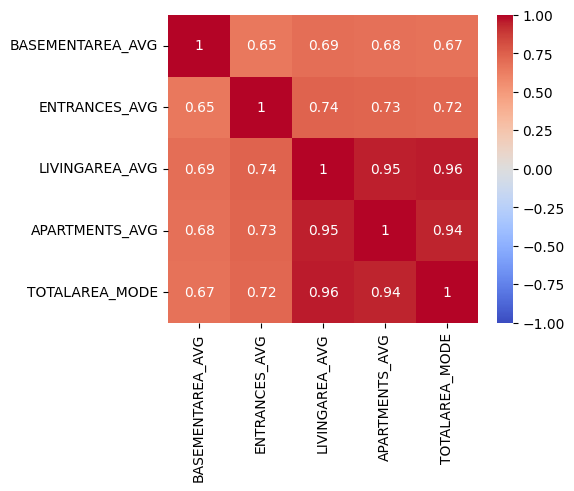

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['BASEMENTAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['BASEMENTAREA_AVG'].notnull()][['BASEMENTAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['BASEMENTAREA_AVG'].isnull()][['BASEMENTAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127567 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BASEMENTAREA_AVG  127567 non-null  float64
 1   ENTRANCES_AVG     127567 non-null  float64
 2   LIVINGAREA_AVG    127567 non-null  float64
 3   APARTMENTS_AVG    127567 non-null  float64
 4   TOTALAREA_MODE    127567 non-null  float64
dtypes: float64(5)
memory usage: 5.8 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179943 entries, 2 to 307509
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BASEMENTAREA_AVG  0 non-null       float64
 1   ENTRANCES_AVG     179943 non-null  float64
 2   LIVINGAREA_AVG    179943 non-null  float64
 3   APARTMENTS_AVG    179943 non-null  float64
 4   TOTALAREA_MODE    179943 non-null  float64
dtypes: float64(5)
memory usage: 8.2 MB


In [ ]:
X = data_train[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['BASEMENTAREA_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.027396522173328854
Root Mean Squared Error (RMSE): 0.05196728040677897
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.5973664474062002


In [ ]:
data_test['BASEMENTAREA_AVG'] = model.predict(data_test[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['BASEMENTAREA_AVG'].isnull(), 'BASEMENTAREA_AVG'] = data_test.loc[df['BASEMENTAREA_AVG'].isnull(), 'BASEMENTAREA_AVG']

### LANDAREA_AVG

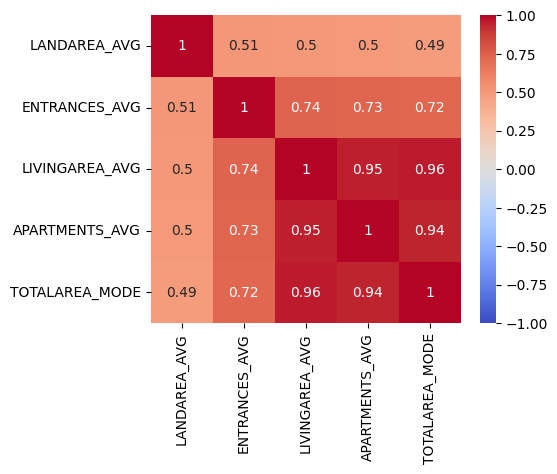

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['LANDAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['LANDAREA_AVG'].notnull()][['LANDAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['LANDAREA_AVG'].isnull()][['LANDAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124920 entries, 0 to 307507
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LANDAREA_AVG    124920 non-null  float64
 1   ENTRANCES_AVG   124920 non-null  float64
 2   LIVINGAREA_AVG  124920 non-null  float64
 3   APARTMENTS_AVG  124920 non-null  float64
 4   TOTALAREA_MODE  124920 non-null  float64
dtypes: float64(5)
memory usage: 5.7 MB


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182590 entries, 2 to 307510
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LANDAREA_AVG    0 non-null       float64
 1   ENTRANCES_AVG   182590 non-null  float64
 2   LIVINGAREA_AVG  182590 non-null  float64
 3   APARTMENTS_AVG  182590 non-null  float64
 4   TOTALAREA_MODE  182590 non-null  float64
dtypes: float64(5)
memory usage: 8.4 MB


In [ ]:
X = data_train[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['LANDAREA_AVG']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

Mean Absolute Error (MAE): 0.03860131331534379
Root Mean Squared Error (RMSE): 0.0696623980534137
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.30135912658245456


In [ ]:
data_test['LANDAREA_AVG'] = model.predict(data_test[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']])

In [ ]:
df.loc[df['LANDAREA_AVG'].isnull(), 'LANDAREA_AVG'] = data_test.loc[df['LANDAREA_AVG'].isnull(), 'LANDAREA_AVG']

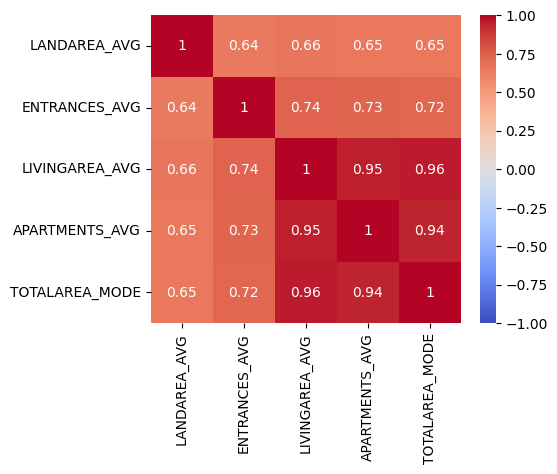

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(df[['LANDAREA_AVG', 'ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

### APARTMENTS_MODE

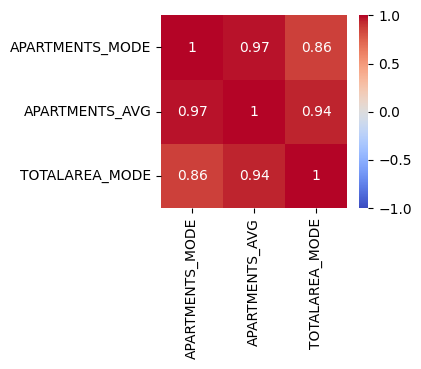

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['APARTMENTS_MODE'].notnull()][['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['APARTMENTS_MODE'].isnull()][['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

X = data_train[['APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['APARTMENTS_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['APARTMENTS_MODE'] = model.predict(data_test[['APARTMENTS_AVG', 'TOTALAREA_MODE']])
df.loc[df['APARTMENTS_MODE'].isnull(), 'APARTMENTS_MODE'] = data_test.loc[df['APARTMENTS_MODE'].isnull(), 'APARTMENTS_MODE']

Mean Absolute Error (MAE): 0.009826174522104637
Root Mean Squared Error (RMSE): 0.025417244566842863
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9451244501851562


### BASEMENTAREA_MODE

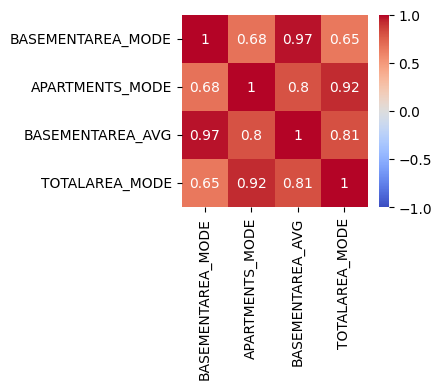

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['BASEMENTAREA_MODE'].notnull()][['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
data_test = df[df['BASEMENTAREA_MODE'].isnull()][['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]

X = data_train[['APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
y = data_train['BASEMENTAREA_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['BASEMENTAREA_MODE'] = model.predict(data_test[['APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']])
df.loc[df['BASEMENTAREA_MODE'].isnull(), 'BASEMENTAREA_MODE'] = data_test.loc[df['BASEMENTAREA_MODE'].isnull(), 'BASEMENTAREA_MODE']

Mean Absolute Error (MAE): 0.0077739167490998365
Root Mean Squared Error (RMSE): 0.01770882935456953
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9550442161537442


### ELEVATORS_MODE

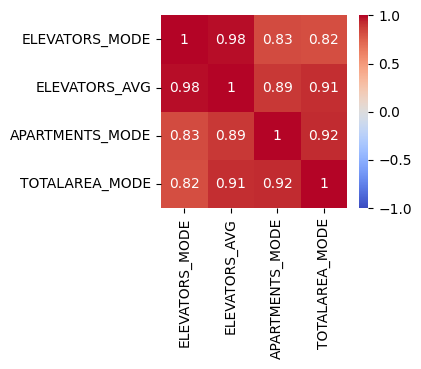

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['ELEVATORS_MODE'].notnull()][['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['ELEVATORS_MODE'].isnull()][['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]

X = data_train[['ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y = data_train['ELEVATORS_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['ELEVATORS_MODE'] = model.predict(data_test[['ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']])
df.loc[df['ELEVATORS_MODE'].isnull(), 'ELEVATORS_MODE'] = data_test.loc[df['ELEVATORS_MODE'].isnull(), 'ELEVATORS_MODE']

Mean Absolute Error (MAE): 0.010826660878278951
Root Mean Squared Error (RMSE): 0.024725847384948207
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9646698977223019


### ENTRANCES_MODE

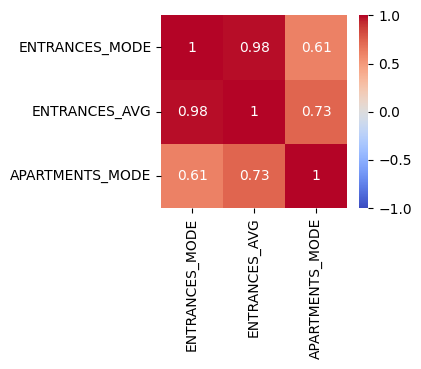

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['ENTRANCES_MODE'].notnull()][['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]
data_test = df[df['ENTRANCES_MODE'].isnull()][['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]

X = data_train[['ENTRANCES_AVG', 'APARTMENTS_MODE']]
y = data_train['ENTRANCES_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['ENTRANCES_MODE'] = model.predict(data_test[['ENTRANCES_AVG', 'APARTMENTS_MODE']])
df.loc[df['ENTRANCES_MODE'].isnull(), 'ENTRANCES_MODE'] = data_test.loc[df['ENTRANCES_MODE'].isnull(), 'ENTRANCES_MODE']

Mean Absolute Error (MAE): 0.009054322169534246
Root Mean Squared Error (RMSE): 0.021013707389809882
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9572565641380592


### FLOORSMAX_MODE

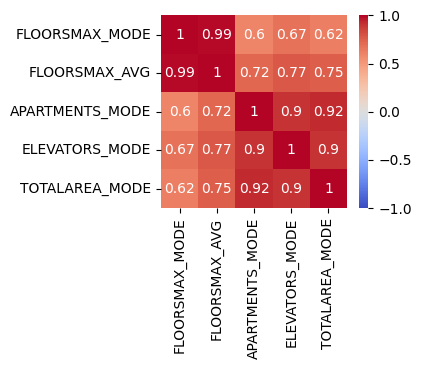

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['FLOORSMAX_MODE'].notnull()][['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['FLOORSMAX_MODE'].isnull()][['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]

X = data_train[['FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
y = data_train['FLOORSMAX_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['FLOORSMAX_MODE'] = model.predict(data_test[['FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']])
df.loc[df['FLOORSMAX_MODE'].isnull(), 'FLOORSMAX_MODE'] = data_test.loc[df['FLOORSMAX_MODE'].isnull(), 'FLOORSMAX_MODE']

Mean Absolute Error (MAE): 0.008744481522762202
Root Mean Squared Error (RMSE): 0.023993738265650044
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9723581199293322


### LANDAREA_MODE

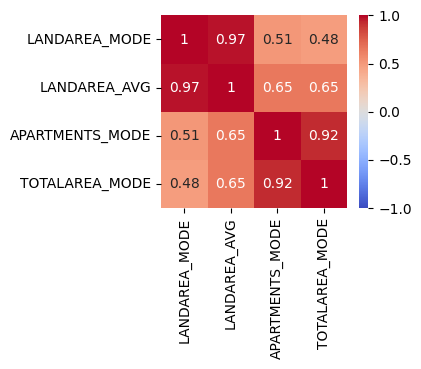

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['LANDAREA_MODE', 'LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['LANDAREA_MODE'].notnull()][['LANDAREA_MODE', 'LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['LANDAREA_MODE'].isnull()][['LANDAREA_MODE', 'LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]

X = data_train[['LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y = data_train['LANDAREA_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['LANDAREA_MODE'] = model.predict(data_test[['LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']])
df.loc[df['LANDAREA_MODE'].isnull(), 'LANDAREA_MODE'] = data_test.loc[df['LANDAREA_MODE'].isnull(), 'LANDAREA_MODE']

Mean Absolute Error (MAE): 0.00589056349680119
Root Mean Squared Error (RMSE): 0.01821532180945817
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9532964377807287


### LIVINGAREA_MODE

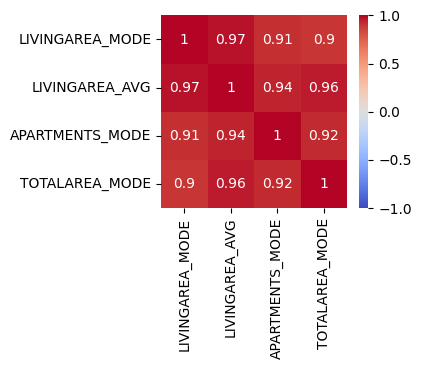

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['LIVINGAREA_MODE'].notnull()][['LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['LIVINGAREA_MODE'].isnull()][['LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]

X = data_train[['LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y = data_train['LIVINGAREA_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['LIVINGAREA_MODE'] = model.predict(data_test[['LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']])
df.loc[df['LIVINGAREA_MODE'].isnull(), 'LIVINGAREA_MODE'] = data_test.loc[df['LIVINGAREA_MODE'].isnull(), 'LIVINGAREA_MODE']

Mean Absolute Error (MAE): 0.010826691167830842
Root Mean Squared Error (RMSE): 0.024435641219192738
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9529904206206041


### NONLIVINGAREA_MODE

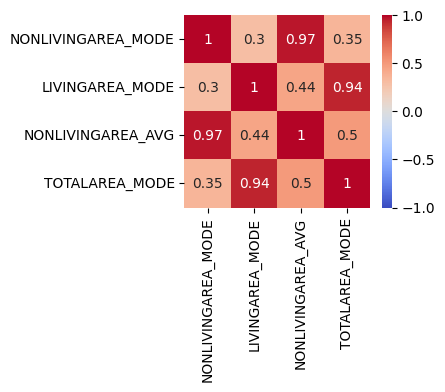

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['NONLIVINGAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['NONLIVINGAREA_MODE'].notnull()][['NONLIVINGAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']]
data_test = df[df['NONLIVINGAREA_MODE'].isnull()][['NONLIVINGAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']]

X = data_train[['LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']]
y = data_train['NONLIVINGAREA_MODE']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['NONLIVINGAREA_MODE'] = model.predict(data_test[['LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']])
df.loc[df['NONLIVINGAREA_MODE'].isnull(), 'NONLIVINGAREA_MODE'] = data_test.loc[df['NONLIVINGAREA_MODE'].isnull(), 'NONLIVINGAREA_MODE']

Mean Absolute Error (MAE): 0.005367319062638734
Root Mean Squared Error (RMSE): 0.01651624913140948
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9433533029495274


### APARTMENTS_MEDI

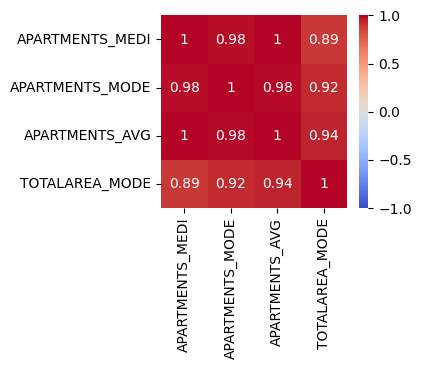

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['APARTMENTS_MEDI'].notnull()][['APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
data_test = df[df['APARTMENTS_MEDI'].isnull()][['APARTMENTS_MEDI', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]

X = data_train[['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y = data_train['APARTMENTS_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['APARTMENTS_MEDI'] = model.predict(data_test[['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']])
df.loc[df['APARTMENTS_MEDI'].isnull(), 'APARTMENTS_MEDI'] = data_test.loc[df['APARTMENTS_MEDI'].isnull(), 'APARTMENTS_MEDI']

Mean Absolute Error (MAE): 0.0018686865392134027
Root Mean Squared Error (RMSE): 0.01096993296041497
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9900100116591289


### BASEMENTAREA_MEDI

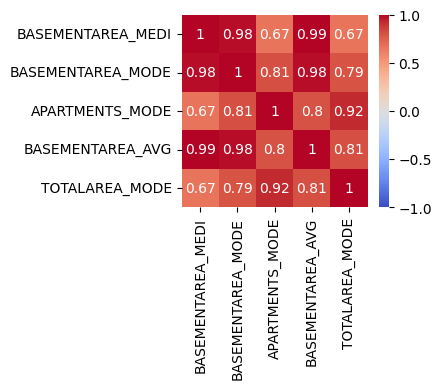

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['BASEMENTAREA_MEDI'].notnull()][['BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
data_test = df[df['BASEMENTAREA_MEDI'].isnull()][['BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]

X = data_train[['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
y = data_train['BASEMENTAREA_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['BASEMENTAREA_MEDI'] = model.predict(data_test[['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']])
df.loc[df['BASEMENTAREA_MEDI'].isnull(), 'BASEMENTAREA_MEDI'] = data_test.loc[df['BASEMENTAREA_MEDI'].isnull(), 'BASEMENTAREA_MEDI']

Mean Absolute Error (MAE): 0.0015865549294062323
Root Mean Squared Error (RMSE): 0.007638899822665557
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9911297328043646


### ELEVATORS_MEDI

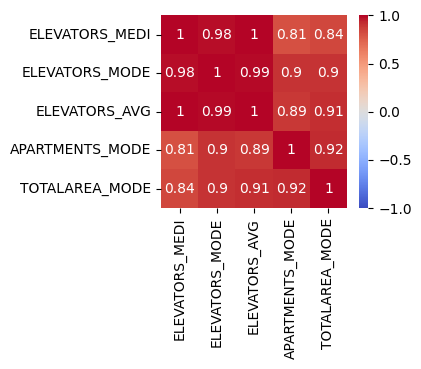

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['ELEVATORS_MEDI'].notnull()][['ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['ELEVATORS_MEDI'].isnull()][['ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]

X = data_train[['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y = data_train['ELEVATORS_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['ELEVATORS_MEDI'] = model.predict(data_test[['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']])
df.loc[df['ELEVATORS_MEDI'].isnull(), 'ELEVATORS_MEDI'] = data_test.loc[df['ELEVATORS_MEDI'].isnull(), 'ELEVATORS_MEDI']

Mean Absolute Error (MAE): 0.002305184630522624
Root Mean Squared Error (RMSE): 0.011371820777942144
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9927999989777003


### ENTRANCES_MEDI

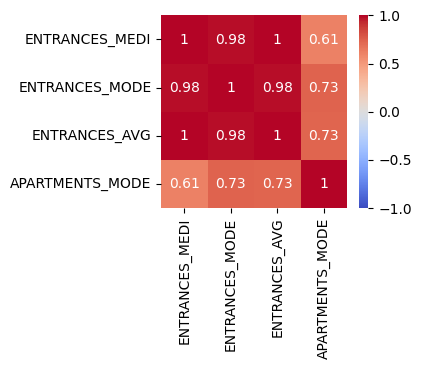

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['ENTRANCES_MEDI'].notnull()][['ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]
data_test = df[df['ENTRANCES_MEDI'].isnull()][['ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]

X = data_train[['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]
y = data_train['ENTRANCES_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['ENTRANCES_MEDI'] = model.predict(data_test[['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']])
df.loc[df['ENTRANCES_MEDI'].isnull(), 'ENTRANCES_MEDI'] = data_test.loc[df['ENTRANCES_MEDI'].isnull(), 'ENTRANCES_MEDI']

Mean Absolute Error (MAE): 0.0016752664603944453
Root Mean Squared Error (RMSE): 0.007429654487530198
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.99458637319446


### FLOORSMAX_MEDI

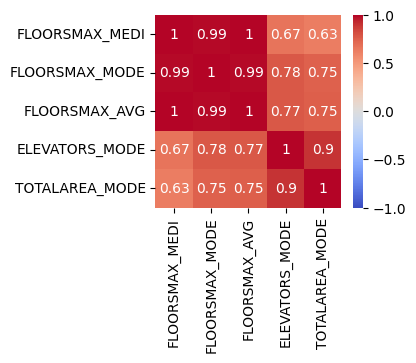

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['FLOORSMAX_MEDI'].notnull()][['FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['FLOORSMAX_MEDI'].isnull()][['FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]

X = data_train[['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
y = data_train['FLOORSMAX_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['FLOORSMAX_MEDI'] = model.predict(data_test[['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']])
df.loc[df['FLOORSMAX_MEDI'].isnull(), 'FLOORSMAX_MEDI'] = data_test.loc[df['FLOORSMAX_MEDI'].isnull(), 'FLOORSMAX_MEDI']

Mean Absolute Error (MAE): 0.002412651813111148
Root Mean Squared Error (RMSE): 0.010453987473453472
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9948357224990213


### LANDAREA_MEDI

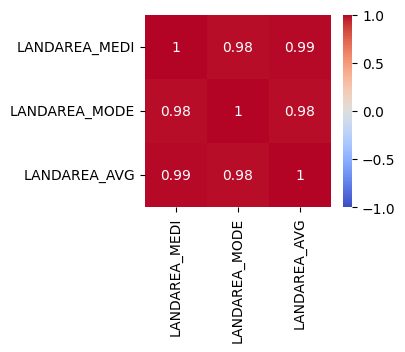

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['LANDAREA_MEDI'].notnull()][['LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG']]
data_test = df[df['LANDAREA_MEDI'].isnull()][['LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG']]

X = data_train[['LANDAREA_MODE', 'LANDAREA_AVG']]
y = data_train['LANDAREA_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['LANDAREA_MEDI'] = model.predict(data_test[['LANDAREA_MODE', 'LANDAREA_AVG']])
df.loc[df['LANDAREA_MEDI'].isnull(), 'LANDAREA_MEDI'] = data_test.loc[df['LANDAREA_MEDI'].isnull(), 'LANDAREA_MEDI']

Mean Absolute Error (MAE): 0.001637564523253508
Root Mean Squared Error (RMSE): 0.009490696717866051
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9873975277665417


### LIVINGAREA_MEDI

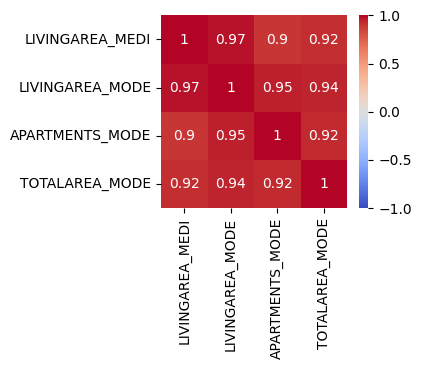

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['LIVINGAREA_MEDI'].notnull()][['LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
data_test = df[df['LIVINGAREA_MEDI'].isnull()][['LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]

X = data_train[['LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y = data_train['LIVINGAREA_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['LIVINGAREA_MEDI'] = model.predict(data_test[['LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']])
df.loc[df['LIVINGAREA_MEDI'].isnull(), 'LIVINGAREA_MEDI'] = data_test.loc[df['LIVINGAREA_MEDI'].isnull(), 'LIVINGAREA_MEDI']

Mean Absolute Error (MAE): 0.008068356907384087
Root Mean Squared Error (RMSE): 0.02315862948362534
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9582284756366751


### NONLIVINGAREA_MEDI

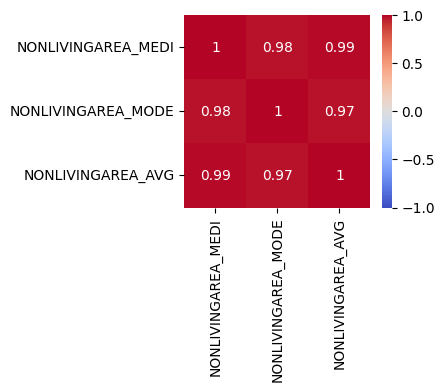

In [ ]:
plt.figure(figsize=(3, 2.5))
sns.heatmap(df[['NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']].corr(), annot=True, cmap='coolwarm', vmin=-1)
plt.show()

In [ ]:
data_train = df[df['NONLIVINGAREA_MEDI'].notnull()][['NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']]
data_test = df[df['NONLIVINGAREA_MEDI'].isnull()][['NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']]

X = data_train[['NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']]
y = data_train['NONLIVINGAREA_MEDI']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
r2 = r2_score(y_val, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared (R^2):", r2)

data_test['NONLIVINGAREA_MEDI'] = model.predict(data_test[['NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']])
df.loc[df['NONLIVINGAREA_MEDI'].isnull(), 'NONLIVINGAREA_MEDI'] = data_test.loc[df['NONLIVINGAREA_MEDI'].isnull(), 'NONLIVINGAREA_MEDI']

Mean Absolute Error (MAE): 0.0012479406097019126
Root Mean Squared Error (RMSE): 0.007175016396739866
Mean Absolute Percentage Error (MAPE): inf
R-squared (R^2): 0.9892815111019795


## Missing Values Handling Categorical Data

Menangani missing values dengan median/modus kategori yang ada atau pengisian random dengan mempertahankan besar perbandingan jumlah data antar kategori.

In [ ]:
print('Total Missing Values')
for i in cat_cols:
    print('  '+i+': '+str(df[i].isnull().sum()))

Total Missing Values
  HOUSETYPE_MODE: 0
  WALLSMATERIAL_MODE: 0
  NAME_EDUCATION_TYPE: 0
  NAME_INCOME_TYPE: 0
  CODE_GENDER: 0
  NAME_TYPE_SUITE: 0
  OCCUPATION_TYPE: 0
  ORGANIZATION_TYPE: 0
  NAME_CONTRACT_TYPE: 0
  NAME_FAMILY_STATUS: 0
  NAME_HOUSING_TYPE: 0
  WEEKDAY_APPR_PROCESS_START: 0


### NAME_TYPE_SUITE

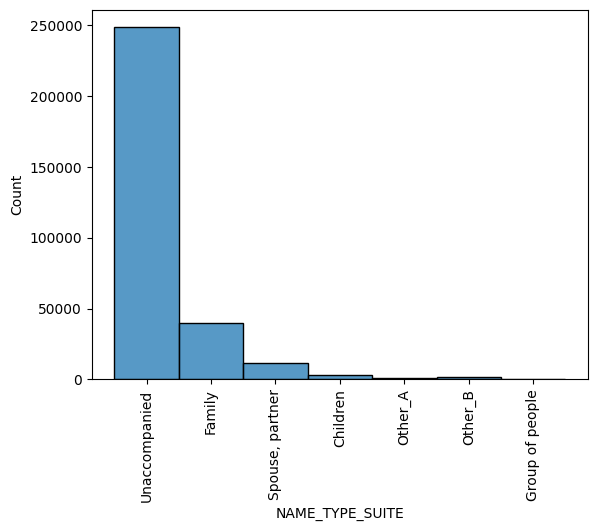

In [ ]:
sns.histplot(df['NAME_TYPE_SUITE'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.loc[df['NAME_TYPE_SUITE'].isnull(), 'NAME_TYPE_SUITE'] = np.random.choice(df[df['NAME_TYPE_SUITE'].notnull()]['NAME_TYPE_SUITE'].unique(), size=df['NAME_TYPE_SUITE'].isnull().sum())

### HOUSETYPE_MODE

In [ ]:
df.groupby(['HOUSETYPE_MODE']).size()

HOUSETYPE_MODE
block of flats      150502
specific housing      1499
terraced house        1212
dtype: int64

<BarContainer object of 3 artists>

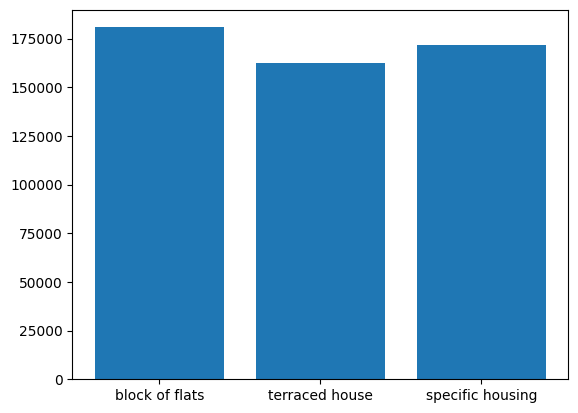

In [ ]:
# Apakah tipe hunian ada korelasi dengan total pendapatan?
kategori = df[df['HOUSETYPE_MODE'].notnull()]['HOUSETYPE_MODE'].unique()
data = df[df['HOUSETYPE_MODE'].notnull()][['HOUSETYPE_MODE', 'AMT_INCOME_TOTAL']].groupby('HOUSETYPE_MODE')['AMT_INCOME_TOTAL'].mean()
plt.bar(kategori, data)

In [ ]:
pd.crosstab(df['HOUSETYPE_MODE'], df['OCCUPATION_TYPE'])

OCCUPATION_TYPE   Accountants  Cleaning staff  Cooking staff  Core staff   
HOUSETYPE_MODE                                                             
block of flats           5471            2377           2499       13815  \
specific housing           51              48             45         119   
terraced house             26              19             34         105   

OCCUPATION_TYPE   Drivers  HR staff  High skill tech staff  IT staff   
HOUSETYPE_MODE                                                         
block of flats       8075       341                   6552       321  \
specific housing       77         5                     57         3   
terraced house         79         5                     48         1   

OCCUPATION_TYPE   Laborers  Low-skill Laborers  Managers  Medicine staff   
HOUSETYPE_MODE                                                             
block of flats       26020                 697     11831            3932  \
specific housing       343                   7        59              62   
terraced house         241                   9        57              37   

OCCUPATION_TYPE   Private service staff  Realty agents  Sales staff   
HOUSETYPE_MODE                                                        
block of flats                     1452            434        15187  \
specific housing                     15              4          181   
terraced house                        9              2          125   

OCCUPATION_TYPE   Secretaries  Security staff  Waiters/barmen staff  
HOUSETYPE_MODE                                                       
block of flats            766            2849                   596  
specific housing            6              40                     8  
terraced house              9              29                     4

In [ ]:
pd.crosstab(df['HOUSETYPE_MODE'], df['ORGANIZATION_TYPE'])

ORGANIZATION_TYPE  Advertising  Agriculture  Bank  Business Entity Type 1   
HOUSETYPE_MODE                                                              
block of flats             267          317  1526                    3176  \
specific housing             2            8     6                      19   
terraced house               0            7    10                      20   

ORGANIZATION_TYPE  Business Entity Type 2  Business Entity Type 3  Cleaning   
HOUSETYPE_MODE                                                                
block of flats                       5939                   36082       142  \
specific housing                       64                     378         5   
terraced house                         42                     280         2   

ORGANIZATION_TYPE  Construction  Culture  Electricity  ...  Trade: type 4   
HOUSETYPE_MODE                                         ...                  
block of flats             3309      220          556  ...             35  \
specific housing             39        1            6  ...              0   
terraced house               22        1            2  ...              0   

ORGANIZATION_TYPE  Trade: type 5  Trade: type 6  Trade: type 7   
HOUSETYPE_MODE                                                   
block of flats                29            356           3758  \
specific housing               0              2             49   
terraced house                 0              3             31   

ORGANIZATION_TYPE  Transport: type 1  Transport: type 2  Transport: type 3   
HOUSETYPE_MODE                                                               
block of flats                    95               1096                541  \
specific housing                   0                 13                  8   
terraced house                     1                 12                  5   

ORGANIZATION_TYPE  Transport: type 4  University    XNA  
HOUSETYPE_MODE                                           
block of flats                  2879         802  26562  
specific housing                  31           4    162  
terraced house                    17           9    205  

[3 rows x 58 columns]

In [ ]:
category_ratios = df['HOUSETYPE_MODE'].value_counts(normalize=True)

missing_values = df['HOUSETYPE_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
df.loc[missing_values, 'HOUSETYPE_MODE'] = imputed_categories

In [ ]:
df.groupby(['HOUSETYPE_MODE']).size()

HOUSETYPE_MODE
block of flats      302107
specific housing      3001
terraced house        2402
dtype: int64

<BarContainer object of 3 artists>

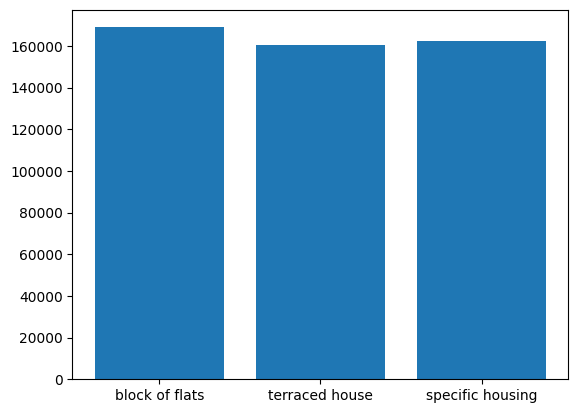

In [ ]:
kategori = df['HOUSETYPE_MODE'].unique()
data = df.groupby('HOUSETYPE_MODE')['AMT_INCOME_TOTAL'].mean()
plt.bar(kategori, data)

### OCCUPATION_TYPE

In [ ]:
df.groupby(['OCCUPATION_TYPE']).size()

OCCUPATION_TYPE
Accountants               9813
Cleaning staff            4653
Cooking staff             5946
Core staff               27570
Drivers                  18603
HR staff                   563
High skill tech staff    11380
IT staff                   526
Laborers                 55186
Low-skill Laborers        2093
Managers                 21371
Medicine staff            8537
Private service staff     2652
Realty agents              751
Sales staff              32102
Secretaries               1305
Security staff            6721
Waiters/barmen staff      1348
dtype: int64

In [ ]:
category_ratios = df['OCCUPATION_TYPE'].value_counts(normalize=True)

missing_values = df['OCCUPATION_TYPE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
df.loc[missing_values, 'OCCUPATION_TYPE'] = imputed_categories

In [ ]:
df.groupby(['OCCUPATION_TYPE']).size()

OCCUPATION_TYPE
Accountants              14227
Cleaning staff            6748
Cooking staff             8702
Core staff               40176
Drivers                  27102
HR staff                   802
High skill tech staff    16656
IT staff                   775
Laborers                 80486
Low-skill Laborers        3061
Managers                 31063
Medicine staff           12360
Private service staff     3862
Realty agents             1088
Sales staff              46770
Secretaries               1886
Security staff            9815
Waiters/barmen staff      1931
dtype: int64

### EMERGENCYSTATE_MODE

In [ ]:
pd.crosstab(df['HOUSETYPE_MODE'], df['EMERGENCYSTATE_MODE'])

EMERGENCYSTATE_MODE      No   Yes
HOUSETYPE_MODE                   
block of flats       156668  2239
specific housing       1559    17
terraced house         1200    72

In [ ]:
category_ratios = df['EMERGENCYSTATE_MODE'].value_counts(normalize=True)

missing_values = df['EMERGENCYSTATE_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
df.loc[missing_values, 'EMERGENCYSTATE_MODE'] = imputed_categories

In [ ]:
pd.crosstab(df['HOUSETYPE_MODE'], df['EMERGENCYSTATE_MODE'])

EMERGENCYSTATE_MODE      No   Yes
HOUSETYPE_MODE                   
block of flats       297833  4274
specific housing       2967    34
terraced house         2311    91

### WALLSMATERIAL_MODE

In [ ]:
pd.crosstab(df['HOUSETYPE_MODE'], df['WALLSMATERIAL_MODE'])

WALLSMATERIAL_MODE  Block  Mixed  Monolithic  Others  Panel  Stone, brick   
HOUSETYPE_MODE                                                              
block of flats       9114   2230        1765    1535  65727         63185  \
specific housing       50     25           7      11    208          1149   
terraced house         89     41           7      79    104           481   

WALLSMATERIAL_MODE  Wooden  
HOUSETYPE_MODE              
block of flats        5008  
specific housing        25  
terraced house         329

In [ ]:
category_ratios = df['WALLSMATERIAL_MODE'].value_counts(normalize=True)

missing_values = df['WALLSMATERIAL_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
df.loc[missing_values, 'WALLSMATERIAL_MODE'] = imputed_categories

#### Save df to Local

In [ ]:
# df.to_csv('D:/Download/cleaned.csv', index=False)

## Regrouping Categorical Data

Kolom dengan kategori yang terlalu banyak akan membuat kolom baru yang banyak saat proses encoding, sehingga perlu pengelompokan lagi menjadi kelompok yang lebih besar/umum dan relevan.

In [ ]:
print('Total Unique Values')
for i in cat_cols:
    print('  '+i+': '+str(len(df[i].unique())))

Total Unique Values
  HOUSETYPE_MODE: 3
  FLAG_OWN_CAR: 2
  FLAG_OWN_REALTY: 2
  WALLSMATERIAL_MODE: 7
  EMERGENCYSTATE_MODE: 2
  NAME_EDUCATION_TYPE: 5
  NAME_INCOME_TYPE: 8
  CODE_GENDER: 3
  NAME_TYPE_SUITE: 7
  OCCUPATION_TYPE: 18
  ORGANIZATION_TYPE: 58
  NAME_CONTRACT_TYPE: 2
  NAME_FAMILY_STATUS: 6
  NAME_HOUSING_TYPE: 6
  WEEKDAY_APPR_PROCESS_START: 7


### ORGANIZATION_TYPE

In [ ]:
df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

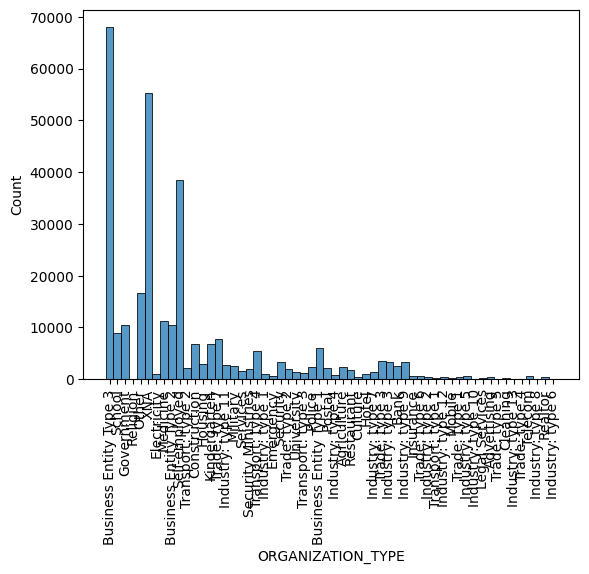

In [ ]:
sns.histplot(data=df, x='ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.show()

In [ ]:
new_cats = {
    'Business': ['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3'],
    'Industry': ['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12', 'Industry: type 13'],
    'Transport': ['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4'],
    'Trade': ['Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7'],
    'Service': ['Cleaning', 'Realtor', 'Legal Services', 'Services', 'Security Services', 'Advertising'],
    'Government': ['Government', 'Security Ministries', 'Postal', 'Police'],
    'Education': ['Kindergarten', 'School', 'University'],
    'Finance': ['Bank', 'Insurance'],
    'Construction': ['Construction', 'Housing'],
    'Hospitality': ['Restaurant', 'Hotel'],
    'Utility': ['Electricity', 'Mobile', 'Telecom'],
    'Entrepreneurship': ['Self-employed'],
    'Medicine': ['Medicine'],
    'Agriculture': ['Agriculture'],
    'Defense': ['Military'],
    'Emergency': ['Emergency'],
    'Security': ['Security'],
    'Others': ['XNA', 'Religion', 'Culture', 'Other']
}

In [ ]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].map({cat: kategori for kategori, cats in new_cats.items() for cat in cats})

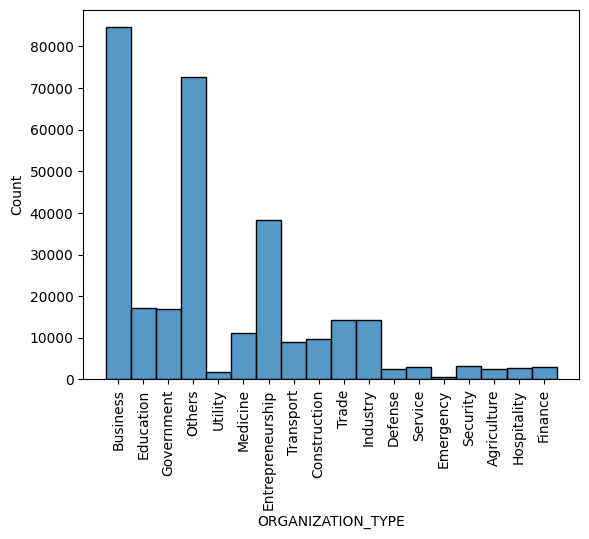

In [ ]:
sns.histplot(data=df, x='ORGANIZATION_TYPE')
plt.xticks(rotation=90)
plt.show()

<Axes: >

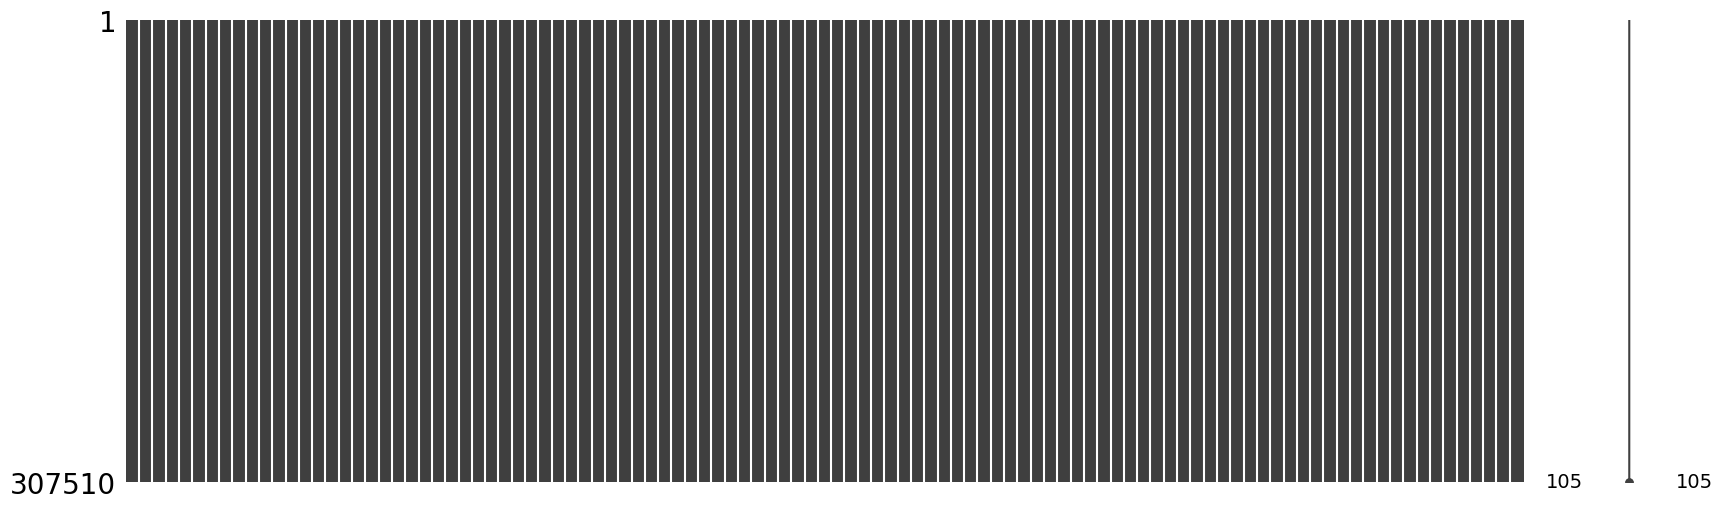

In [ ]:
mno.matrix(df, figsize=(20, 6))

## Encoding Categorical Features

Pengubahan bentuk data kategori ke numerik dengan encoding. Kolom dengan dua kategori (ya, tidak atau true, false) diencoding dengan label encoding. Sedangkan kolom dengan kategori lebih dari dua, diencoding dengan metode one hot encoding.

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
df['FLAG_OWN_REALTY_encoded'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])

In [ ]:
df['FLAG_OWN_CAR_encoded'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])

In [ ]:
df['EMERGENCYSTATE_MODE_encoded'] = label_encoder.fit_transform(df['EMERGENCYSTATE_MODE'])

In [ ]:
df = df.drop(['EMERGENCYSTATE_MODE', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR'], axis=1)

### One Hot Encoding

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [ ]:
df_encoded = pd.get_dummies(df, columns=cat_cols, dummy_na=False)
df_encoded = df_encoded.astype(int)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307510 entries, 0 to 307510
Columns: 183 entries, SK_ID_CURR to WEEKDAY_APPR_PROCESS_START_WEDNESDAY
dtypes: int32(183)
memory usage: 225.1 MB


In [ ]:
len(df_encoded)

307510

In [ ]:
df_encoded.head(3)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT   
0      100002       1             0            202500      406597  \
1      100003       0             0            270000     1293502   
2      100004       0             0             67500      135000   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH   
0        24700           351000                           0       -9461  \
1        35698          1129500                           0      -16765   
2         6750           135000                           0      -19046   

   DAYS_EMPLOYED  ...  NAME_HOUSING_TYPE_Office apartment   
0           -637  ...                                   0  \
1          -1188  ...                                   0   
2           -225  ...                                   0   

   NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents   
0                                   0                               0  \
1                                   0                               0   
2                                   0                               0   

   WEEKDAY_APPR_PROCESS_START_FRIDAY  WEEKDAY_APPR_PROCESS_START_MONDAY   
0                                  0                                  0  \
1                                  0                                  1   
2                                  0                                  1   

   WEEKDAY_APPR_PROCESS_START_SATURDAY  WEEKDAY_APPR_PROCESS_START_SUNDAY   
0                                    0                                  0  \
1                                    0                                  0   
2                                    0                                  0   

   WEEKDAY_APPR_PROCESS_START_THURSDAY  WEEKDAY_APPR_PROCESS_START_TUESDAY   
0                                    0                                   0  \
1                                    0                                   0   
2                                    0                                   0   

   WEEKDAY_APPR_PROCESS_START_WEDNESDAY  
0                                     1  
1                                     0  
2                                     0  

[3 rows x 183 columns]

In [ ]:
df_encoded['ORGANIZATION_TYPE_Trade'].unique()

array([0, 1])

#### Save df to Local

In [ ]:
# df_encoded.to_csv('D:/Download/cleaned_encoded.csv', index=False)

# **Modeling**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("C:\\Users\\abdul khahar\\Downloads\\cleaned_encoded.csv")
df.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0            202500      406597   
1      100003       0             0            270000     1293502   
2      100004       0             0             67500      135000   
3      100006       0             0            135000      312682   
4      100007       0             0            121500      513000   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        24700           351000                           0       -9461   
1        35698          1129500                           0      -16765   
2         6750           135000                           0      -19046   
3        29686           297000                           0      -19005   
4        21865           513000                           0      -19932   

   DAYS_EMPLOYED  ...  NAME_HOUSING_TYPE_Office apartment  \
0           -637  ...                                   0   
1          -1188  ...                                   0   
2           -225  ...                                   0   
3          -3039  ...                                   0   
4          -3038  ...                                   0   

   NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   WEEKDAY_APPR_PROCESS_START_FRIDAY  WEEKDAY_APPR_PROCESS_START_MONDAY  \
0                                  0                                  0   
1                                  0                                  1   
2                                  0                                  1   
3                                  0                                  0   
4                                  0                                  0   

   WEEKDAY_APPR_PROCESS_START_SATURDAY  WEEKDAY_APPR_PROCESS_START_SUNDAY  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   WEEKDAY_APPR_PROCESS_START_THURSDAY  WEEKDAY_APPR_PROCESS_START_TUESDAY  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    1                                   0   

   WEEKDAY_APPR_PROCESS_START_WEDNESDAY  
0                                     1  
1                                     0  
2                                     0  
3                                     1  
4                                     0  

[5 rows x 183 columns]

In [ ]:
X = df.drop('TARGET',axis=1)
y = df['TARGET']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
classifiers = {
    "Logisitic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state = 0),
    "XGBoost": xgb.XGBClassifier(objective='binary:logistic'),
    "KNN": KNeighborsClassifier(n_neighbors=7)
}

## First Trial

### Models Implementation and Show Confusion Matrix

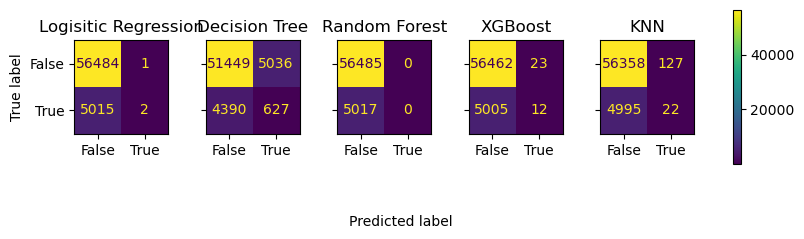

In [ ]:
scores = {'model':[],'accuracy':[],'precision':[],'recall':[],'specificity':[],'f1':[],'roc_auc':[]}
f, axes = plt.subplots(1, 5, figsize=(10, 2), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)

    scores['model'].append(key)
    scores['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores['precision'].append(metrics.precision_score(y_test, y_pred))
    scores['recall'].append(metrics.recall_score(y_test, y_pred))
    scores['specificity'].append(metrics.recall_score(y_test, y_pred, pos_label=0))
    scores['f1'].append(metrics.f1_score(y_test, y_pred))
    scores['roc_auc'].append(metrics.roc_auc_score(y_test, y_pred))

    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_disp = metrics.ConfusionMatrixDisplay(cm,
                                  display_labels=[False, True])
    cm_disp.plot(ax=axes[i])
    cm_disp.ax_.set_title(key)
    cm_disp.im_.colorbar.remove()
    cm_disp.ax_.set_xlabel('')
    if i!=0:
        cm_disp.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.text(0.4, -0.2, 'Predicted label')
f.colorbar(cm_disp.im_, ax=axes)
plt.show()

### Models Scoring

In [ ]:
scores

{'model': ['Logisitic Regression',
  'Decision Tree',
  'Random Forest',
  'XGBoost',
  'KNN'],
 'accuracy': [0.9184416766934409,
  0.8467366914897076,
  0.9184254170596078,
  0.9182465610874443,
  0.916718155507138],
 'precision': [0.6666666666666666,
  0.11071870033551122,
  0.0,
  0.34285714285714286,
  0.1476510067114094],
 'recall': [0.00039864460833167234,
  0.12497508471197927,
  0.0,
  0.002391867649990034,
  0.004385090691648395],
 'specificity': [0.9999822961848278,
  0.9108435867929539,
  1.0,
  0.9995928122510401,
  0.9977516154731345],
 'f1': [0.000796812749003984,
  0.11741573033707865,
  0.0,
  0.004750593824228028,
  0.008517228029423151],
 'roc_auc': [0.5001904703965798,
  0.5179093357524666,
  0.5,
  0.5009923399505151,
  0.5010683530823915]}

In [ ]:
!pip install imblearn

     -------------------------------------- 226.0/226.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Second Trial: Using SMOTETomek Sampling

In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

### Sampling

In [ ]:
# Implementing Oversampling for Handling Imbalanced
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train,y_train)

### Models Implementation and Show Confusion Matrix

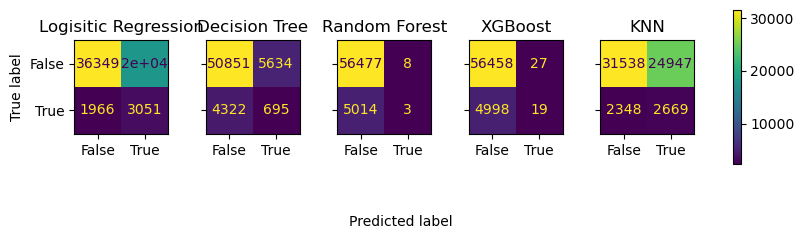

In [ ]:
scores2 = {'model':[],'accuracy':[],'precision':[],'recall':[],'specificity':[],'f1':[],'roc_auc':[]}
f, axes = plt.subplots(1, 5, figsize=(10, 2), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_res,y_res).predict(X_test)

    scores2['model'].append(key)
    scores2['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores2['precision'].append(metrics.precision_score(y_test, y_pred))
    scores2['recall'].append(metrics.recall_score(y_test, y_pred))
    scores2['specificity'].append(metrics.recall_score(y_test, y_pred, pos_label=0))
    scores2['f1'].append(metrics.f1_score(y_test, y_pred))
    scores2['roc_auc'].append(metrics.roc_auc_score(y_test, y_pred))

    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_disp = metrics.ConfusionMatrixDisplay(cm,
                                  display_labels=[False, True])
    cm_disp.plot(ax=axes[i])
    cm_disp.ax_.set_title(key)
    cm_disp.im_.colorbar.remove()
    cm_disp.ax_.set_xlabel('')
    if i!=0:
        cm_disp.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.text(0.4, -0.2, 'Predicted label')
f.colorbar(cm_disp.im_, ax=axes)
plt.show()

### Models Scoring

In [ ]:
scores2

{'model': ['Logisitic Regression',
  'Decision Tree',
  'Random Forest',
  'XGBoost',
  'KNN'],
 'accuracy': [0.6406295730220155,
  0.8381190855581933,
  0.9183441188904425,
  0.9182953399889434,
  0.5561932945270073],
 'precision': [0.13158235218010092,
  0.10981197661557908,
  0.2727272727272727,
  0.41304347826086957,
  0.09664687137891077],
 'recall': [0.6081323500099661,
  0.13852900139525612,
  0.0005979669124975084,
  0.003787123779150887,
  0.5319912298186167],
 'specificity': [0.6435159776931929,
  0.9002567053199965,
  0.9998583694786226,
  0.9995219969903514,
  0.558342922899885],
 'f1': [0.21635229045525456,
  0.12251013573065396,
  0.0011933174224343674,
  0.007505431562314833,
  0.16357674746422332],
 'roc_auc': [0.6258241638515796,
  0.5193928533576263,
  0.5002281681955602,
  0.5016545603847512,
  0.5451670763592508]}

## Third Trial: Using RandomOverSampler

In [ ]:
from imblearn.over_sampling import RandomOverSampler

### Sampling

In [ ]:
ros = RandomOverSampler(sampling_strategy=1)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

### Models Implementation and Show Confusion Matrix

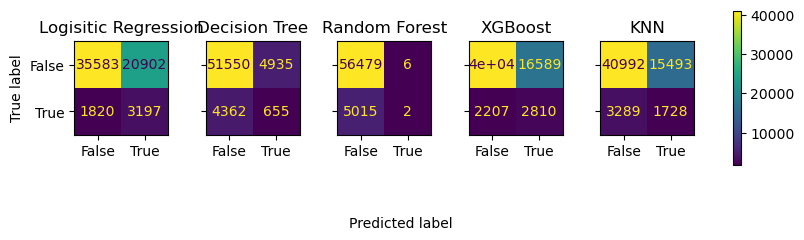

In [ ]:
scores3 = {'model':[],'accuracy':[],'precision':[],'recall':[],'specificity':[],'f1':[],'roc_auc':[]}
f, axes = plt.subplots(1, 5, figsize=(10, 2), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train_res, y_train_res).predict(X_test)

    scores3['model'].append(key)
    scores3['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    scores3['precision'].append(metrics.precision_score(y_test, y_pred))
    scores3['recall'].append(metrics.recall_score(y_test, y_pred))
    scores3['specificity'].append(metrics.recall_score(y_test, y_pred, pos_label=0))
    scores3['f1'].append(metrics.f1_score(y_test, y_pred))
    scores3['roc_auc'].append(metrics.roc_auc_score(y_test, y_pred))

    cm = metrics.confusion_matrix(y_test, y_pred)
    cm_disp = metrics.ConfusionMatrixDisplay(cm,
                                  display_labels=[False, True])
    cm_disp.plot(ax=axes[i])
    cm_disp.ax_.set_title(key)
    cm_disp.im_.colorbar.remove()
    cm_disp.ax_.set_xlabel('')
    if i!=0:
        cm_disp.ax_.set_ylabel('')

plt.subplots_adjust(wspace=0.40, hspace=0.1)
f.text(0.4, -0.2, 'Predicted label')
f.colorbar(cm_disp.im_, ax=axes)
plt.show()

### Models Scoring

In [ ]:
scores3

{'model': ['Logisitic Regression',
  'Decision Tree',
  'Random Forest',
  'XGBoost',
  'KNN'],
 'accuracy': [0.6305486000455269,
  0.8488341842541706,
  0.9183603785242757,
  0.6943839224740659,
  0.6946115573477285],
 'precision': [0.13266110626996971,
  0.11717352415026834,
  0.25,
  0.14485282746533326,
  0.10034260495906161],
 'recall': [0.6372334064181782,
  0.13055610922862268,
  0.00039864460833167234,
  0.5600956747059996,
  0.34442894159856485],
 'specificity': [0.629954855271311,
  0.912631672125343,
  0.999893777108967,
  0.7063114101088784,
  0.7257147915375763],
 'f1': [0.219604341255667,
  0.12350334684642217,
  0.0007960199004975125,
  0.23017693315858453,
  0.15540965914200916],
 'roc_auc': [0.6335941308447446,
  0.5215938906769828,
  0.5001462108586493,
  0.6332035424074391,
  0.5350718665680706]}

# **Evaluation**

## Evaluate Results

Beberapa model digunakan sebagai perbandingan:
1. Logisitic Regression
2. Decision Tree
3. Random Forest
4. XGBoost
5. KNN

Percobaan dilakukan tiga kali dengan metode yang berbeda, percobaan pertama hanya pemodelan, percobaan kedua sebelum pemodelan diterapkan sampling menggunakan SMOTETomek, dan percobaan terakhir menggunakan RandomOverSampler.

Penerapan sampling bertujuan mengatasi data yang imbalance, seperti dari hasil percobaan pertama dimana nilai dalam confusion matrix tidak seimbang.
<br><br>

Scoring ROC-AUC didapatkan dari percobaan pertama sebagai berikut:
1. Logisitic Regression: 0.5001904703965798
2. Decision Tree: 0.5179093357524666
3. Random Forest: 0.5
4. XGBoost: 0.5009923399505151
5. KNN: 0.5010683530823915

Scoring ROC-AUC didapatkan dari percobaan kedua (SMOTETomek Sampling) sebagai berikut:
1. Logisitic Regression: 0.6258241638515796
2. Decision Tree: 0.5193928533576263
3. Random Forest: 0.5002281681955602
4. XGBoost: 0.5016545603847512
5. KNN: 0.5451670763592508

Scoring ROC-AUC didapatkan dari percobaan ketiga (RandomOverSampler) sebagai berikut:
1. Logisitic Regression: 0.6335941308447446
2. Decision Tree: 0.5215938906769828
3. Random Forest: 0.5001462108586493
4. XGBoost: 0.6332035424074391
5. KNN: 0.5350718665680706


Dari ketiga percobaan tersebut dengan beberapa model yang diimplementasikan, skor **ROC-AUC tertinggi** yaitu pada angka **'0.6335941308447446'** dimana menggunakan model **'Logisitic Regression'** dan metode sampling **'RandomOverSampler'**.

Interpretasi Nilai Area Under the Curve (AUC) :<br>
* AUC > 0.5, Kemampuan prediksi dari model lebih baik daripada prediksi acak, semakin dekat dengan '1' maka semakin baik kinerjanya.
* AUC = 0.5, Prediksi dari model tidak memberikan informasi yang bermakna.
* AUC < 0.5, Prediksi dari model cenderung berbanding terbalik (salah) terhadap kelas yang sebenarnya. Kinerja buruk.

Selain itu, nilai FN (prediksi bisa membayar namun pada aktualnya tidak) dari confusion matrix juga menjadi pertimbangan. Sesuai dengan bussiness case, Bank semaksimal mungkin menghindari untuk menyita aset kreditur, sehingga nilai FN dari model yang akan digunakan harus yang paling rendah (menghindari kerugian).

Dari percobaan ketiga, didapatkan nilai FN terendah yaitu pada Model Logistic Regression: '1820' daripada keempat model lainnya pada percobaan yang sama.


**Approved Model:**<br>
Logistic Regression (dengan metode RandomOverSampler)

## Modeling Review Process

# **Data Test Predicting**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_train = pd.read_csv("C:\\Users\\abdul khahar\\Downloads\\cleaned_encoded.csv")
data_test  = pd.read_csv("C:\\Users\\abdul khahar\\Downloads\\Compressed\\application_test.csv")


In [ ]:
data_train.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0            202500      406597   
1      100003       0             0            270000     1293502   
2      100004       0             0             67500      135000   
3      100006       0             0            135000      312682   
4      100007       0             0            121500      513000   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        24700           351000                           0       -9461   
1        35698          1129500                           0      -16765   
2         6750           135000                           0      -19046   
3        29686           297000                           0      -19005   
4        21865           513000                           0      -19932   

   DAYS_EMPLOYED  ...  NAME_HOUSING_TYPE_Office apartment  \
0           -637  ...                                   0   
1          -1188  ...                                   0   
2           -225  ...                                   0   
3          -3039  ...                                   0   
4          -3038  ...                                   0   

   NAME_HOUSING_TYPE_Rented apartment  NAME_HOUSING_TYPE_With parents  \
0                                   0                               0   
1                                   0                               0   
2                                   0                               0   
3                                   0                               0   
4                                   0                               0   

   WEEKDAY_APPR_PROCESS_START_FRIDAY  WEEKDAY_APPR_PROCESS_START_MONDAY  \
0                                  0                                  0   
1                                  0                                  1   
2                                  0                                  1   
3                                  0                                  0   
4                                  0                                  0   

   WEEKDAY_APPR_PROCESS_START_SATURDAY  WEEKDAY_APPR_PROCESS_START_SUNDAY  \
0                                    0                                  0   
1                                    0                                  0   
2                                    0                                  0   
3                                    0                                  0   
4                                    0                                  0   

   WEEKDAY_APPR_PROCESS_START_THURSDAY  WEEKDAY_APPR_PROCESS_START_TUESDAY  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    1                                   0   

   WEEKDAY_APPR_PROCESS_START_WEDNESDAY  
0                                     1  
1                                     0  
2                                     0  
3                                     1  
4                                     0  

[5 rows x 183 columns]

In [ ]:
data_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

## Missing Values Checking

In [ ]:
data = {
    'coloumn' : [],
    'persentage' : []
}

for i in data_test :
  data['coloumn'].append(i)
  data['persentage'].append((data_test[i].isna().sum()/len(data_test))*100)

data_test_isna = pd.DataFrame(data)

data_test_isna.sort_values('persentage', ascending=False).head(17)

coloumn  persentage
47            COMMONAREA_AVG   68.716150
61           COMMONAREA_MODE   68.716150
75           COMMONAREA_MEDI   68.716150
55   NONLIVINGAPARTMENTS_AVG   68.412523
69  NONLIVINGAPARTMENTS_MODE   68.412523
83  NONLIVINGAPARTMENTS_MEDI   68.412523
85        FONDKAPREMONT_MODE   67.284179
53      LIVINGAPARTMENTS_AVG   67.249302
67     LIVINGAPARTMENTS_MODE   67.249302
81     LIVINGAPARTMENTS_MEDI   67.249302
79            FLOORSMIN_MEDI   66.605121
51             FLOORSMIN_AVG   66.605121
65            FLOORSMIN_MODE   66.605121
20               OWN_CAR_AGE   66.289184
46           YEARS_BUILD_AVG   65.275726
74          YEARS_BUILD_MEDI   65.275726
60          YEARS_BUILD_MODE   65.275726

## Tresholding for Missing Values

In [ ]:
data_test = data_test[data_test_isna[data_test_isna['persentage'] <= 65]['coloumn']]
data_test.head(3)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  

[3 rows x 104 columns]

## Split to Numeric and Categoring

In [ ]:
cols = data_test.columns
num_cols = data_test._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [ ]:
print('Total Missing Values')
for i in num_cols:
    print('  '+i+': '+str(data_test[i].isnull().sum()))

Total Missing Values
  SK_ID_CURR: 0
  CNT_CHILDREN: 0
  AMT_INCOME_TOTAL: 0
  AMT_CREDIT: 0
  AMT_ANNUITY: 24
  AMT_GOODS_PRICE: 0
  REGION_POPULATION_RELATIVE: 0
  DAYS_BIRTH: 0
  DAYS_EMPLOYED: 0
  DAYS_REGISTRATION: 0
  DAYS_ID_PUBLISH: 0
  FLAG_MOBIL: 0
  FLAG_EMP_PHONE: 0
  FLAG_WORK_PHONE: 0
  FLAG_CONT_MOBILE: 0
  FLAG_PHONE: 0
  FLAG_EMAIL: 0
  CNT_FAM_MEMBERS: 0
  REGION_RATING_CLIENT: 0
  REGION_RATING_CLIENT_W_CITY: 0
  HOUR_APPR_PROCESS_START: 0
  REG_REGION_NOT_LIVE_REGION: 0
  REG_REGION_NOT_WORK_REGION: 0
  LIVE_REGION_NOT_WORK_REGION: 0
  REG_CITY_NOT_LIVE_CITY: 0
  REG_CITY_NOT_WORK_CITY: 0
  LIVE_CITY_NOT_WORK_CITY: 0
  EXT_SOURCE_1: 20532
  EXT_SOURCE_2: 8
  EXT_SOURCE_3: 8668
  APARTMENTS_AVG: 23887
  BASEMENTAREA_AVG: 27641
  YEARS_BEGINEXPLUATATION_AVG: 22856
  ELEVATORS_AVG: 25189
  ENTRANCES_AVG: 23579
  FLOORSMAX_AVG: 23321
  LANDAREA_AVG: 28254
  LIVINGAREA_AVG: 23552
  NONLIVINGAREA_AVG: 26084
  APARTMENTS_MODE: 23887
  BASEMENTAREA_MODE: 27641
  YEARS_BEGIN

## Missing Values Handling

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train = data_train[['AMT_GOODS_PRICE', 'AMT_CREDIT']]
y_train = data_train['AMT_ANNUITY']
X_val   = data_test[['AMT_GOODS_PRICE', 'AMT_CREDIT']]
y_val   = data_test['AMT_ANNUITY'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['AMT_ANNUITY'] = model.predict(X_val)

In [ ]:
X_train = data_train[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']]
y_train = data_train['EXT_SOURCE_1']
X_val   = data_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE']]
y_val   = data_test['EXT_SOURCE_1'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['EXT_SOURCE_1'] = model.predict(X_val)

In [ ]:
X_train = data_train[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE']]
y_train = data_train['EXT_SOURCE_2']
X_val   = data_test[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_LAST_PHONE_CHANGE', 'REGION_POPULATION_RELATIVE']]
y_val   = data_test['EXT_SOURCE_2'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['EXT_SOURCE_2'] = model.predict(X_val)

In [ ]:
X_train = data_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
y_train = data_train['EXT_SOURCE_3']
X_val   = data_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_EMPLOYED', 'DAYS_BIRTH']]
y_val   = data_test['EXT_SOURCE_3'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['EXT_SOURCE_3'] = model.predict(X_val)

In [ ]:
value_ratios = data_test['TOTALAREA_MODE'].value_counts(normalize=True)
missing_values = data_test['TOTALAREA_MODE'].isnull()
num_missing_values = missing_values.sum()
imputed_values = np.random.choice(value_ratios.index, size=num_missing_values, p=value_ratios.values)
data_test.loc[missing_values, 'TOTALAREA_MODE'] = imputed_values

In [ ]:
X_train = data_train[['TOTALAREA_MODE']]
y_train = data_train['APARTMENTS_AVG']
X_val   = data_test[['TOTALAREA_MODE']]
y_val   = data_test['APARTMENTS_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['APARTMENTS_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['TOTALAREA_MODE','APARTMENTS_AVG']]
y_train = data_train['FLOORSMAX_AVG']
X_val   = data_test[['TOTALAREA_MODE','APARTMENTS_AVG']]
y_val   = data_test['FLOORSMAX_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['FLOORSMAX_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]
y_train = data_train['LIVINGAREA_AVG']
X_val   = data_test[['APARTMENTS_AVG', 'FLOORSMAX_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['LIVINGAREA_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['LIVINGAREA_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['ENTRANCES_AVG']
X_val   = data_test[['LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['ENTRANCES_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['ENTRANCES_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['ELEVATORS_AVG']
X_val   = data_test[['FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['ELEVATORS_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['ELEVATORS_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['NONLIVINGAREA_AVG']
X_val   = data_test[['ELEVATORS_AVG', 'FLOORSMAX_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['NONLIVINGAREA_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['NONLIVINGAREA_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['BASEMENTAREA_AVG']
X_val   = data_test[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['BASEMENTAREA_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['BASEMENTAREA_AVG'] = model.predict(X_val)

In [ ]:
X_train = data_train[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['LANDAREA_AVG']
X_val   = data_test[['ENTRANCES_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['LANDAREA_AVG'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['LANDAREA_AVG'] = model.predict(X_val)

In [ ]:
value_ratios = data_test['YEARS_BEGINEXPLUATATION_AVG'].value_counts(normalize=True)

missing_values = data_test['YEARS_BEGINEXPLUATATION_AVG'].isnull()
num_missing_values = missing_values.sum()

imputed_values = np.random.choice(value_ratios.index, size=num_missing_values, p=value_ratios.values)

data_test.loc[missing_values, 'YEARS_BEGINEXPLUATATION_AVG'] = imputed_values

In [ ]:
X_train = data_train[['YEARS_BEGINEXPLUATATION_AVG']]
y_train = data_train['YEARS_BEGINEXPLUATATION_MODE']
X_val   = data_test[['YEARS_BEGINEXPLUATATION_AVG']]
y_val   = data_test['YEARS_BEGINEXPLUATATION_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['YEARS_BEGINEXPLUATATION_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']]
y_train = data_train['YEARS_BEGINEXPLUATATION_MEDI']
X_val   = data_test[['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE']]
y_val   = data_test['YEARS_BEGINEXPLUATATION_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['YEARS_BEGINEXPLUATATION_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['APARTMENTS_MODE']
X_val   = data_test[['APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['APARTMENTS_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['APARTMENTS_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
y_train = data_train['BASEMENTAREA_MODE']
X_val   = data_test[['APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['BASEMENTAREA_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['BASEMENTAREA_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['APARTMENTS_MODE', 'ELEVATORS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['ELEVATORS_MODE']
X_val   = data_test[['APARTMENTS_MODE', 'ELEVATORS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['ELEVATORS_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['ELEVATORS_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['ENTRANCES_AVG', 'APARTMENTS_MODE']]
y_train = data_train['ENTRANCES_MODE']
X_val   = data_test[['ENTRANCES_AVG', 'APARTMENTS_MODE']]
y_val   = data_test['ENTRANCES_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['ENTRANCES_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
y_train = data_train['FLOORSMAX_MODE']
X_val   = data_test[['FLOORSMAX_AVG', 'APARTMENTS_MODE', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
y_val   = data_test['FLOORSMAX_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['FLOORSMAX_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_train = data_train['LANDAREA_MODE']
X_val   = data_test[['LANDAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_val   = data_test['LANDAREA_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['LANDAREA_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_train = data_train['LIVINGAREA_MODE']
X_val   = data_test[['LIVINGAREA_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_val   = data_test['LIVINGAREA_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['LIVINGAREA_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']]
y_train = data_train['NONLIVINGAREA_MODE']
X_val   = data_test[['LIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['NONLIVINGAREA_MODE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['NONLIVINGAREA_MODE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_train = data_train['APARTMENTS_MEDI']
X_val   = data_test[['APARTMENTS_MODE', 'APARTMENTS_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['APARTMENTS_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['APARTMENTS_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
y_train = data_train['BASEMENTAREA_MEDI']
X_val   = data_test[['BASEMENTAREA_MODE', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'TOTALAREA_MODE']]
y_val   = data_test['BASEMENTAREA_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['BASEMENTAREA_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_train = data_train['ELEVATORS_MEDI']
X_val   = data_test[['ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_val   = data_test['ELEVATORS_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['ELEVATORS_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]
y_train = data_train['ENTRANCES_MEDI']
X_val   = data_test[['ENTRANCES_MODE', 'ENTRANCES_AVG', 'APARTMENTS_MODE']]
y_val   = data_test['ENTRANCES_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['ENTRANCES_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
y_train = data_train['FLOORSMAX_MEDI']
X_val   = data_test[['FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'ELEVATORS_MODE', 'TOTALAREA_MODE']]
y_val   = data_test['FLOORSMAX_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['FLOORSMAX_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['LANDAREA_MODE', 'LANDAREA_AVG']]
y_train = data_train['LANDAREA_MEDI']
X_val   = data_test[['LANDAREA_MODE', 'LANDAREA_AVG']]
y_val   = data_test['LANDAREA_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['LANDAREA_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_train = data_train['LIVINGAREA_MEDI']
X_val   = data_test[['LIVINGAREA_MODE', 'APARTMENTS_MODE', 'TOTALAREA_MODE']]
y_val   = data_test['LIVINGAREA_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['LIVINGAREA_MEDI'] = model.predict(X_val)

In [ ]:
X_train = data_train[['NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']]
y_train = data_train['NONLIVINGAREA_MEDI']
X_val   = data_test[['NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG']]
y_val   = data_test['NONLIVINGAREA_MEDI'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['NONLIVINGAREA_MEDI'] = model.predict(X_val)

In [ ]:
data_test['OBS_30_CNT_SOCIAL_CIRCLE'] = data_test['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data_test['OBS_30_CNT_SOCIAL_CIRCLE'].median())

In [ ]:
X_train = data_train[['OBS_30_CNT_SOCIAL_CIRCLE']]
y_train = data_train['OBS_60_CNT_SOCIAL_CIRCLE']
X_val   = data_test[['OBS_30_CNT_SOCIAL_CIRCLE']]
y_val   = data_test['OBS_60_CNT_SOCIAL_CIRCLE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['OBS_60_CNT_SOCIAL_CIRCLE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]
y_train = data_train['DEF_30_CNT_SOCIAL_CIRCLE']
X_val   = data_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']]
y_val   = data_test['DEF_30_CNT_SOCIAL_CIRCLE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['DEF_30_CNT_SOCIAL_CIRCLE'] = model.predict(X_val)

In [ ]:
X_train = data_train[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']]
y_train = data_train['DEF_60_CNT_SOCIAL_CIRCLE']
X_val   = data_test[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE']]
y_val   = data_test['DEF_60_CNT_SOCIAL_CIRCLE'].notnull()

model   = LinearRegression()
model.fit(X_train, y_train)

data_test['DEF_60_CNT_SOCIAL_CIRCLE'] = model.predict(X_val)

In [ ]:
data_test['AMT_REQ_CREDIT_BUREAU_HOUR'] = data_test['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(0)
data_test['AMT_REQ_CREDIT_BUREAU_DAY']  = data_test['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(0)
data_test['AMT_REQ_CREDIT_BUREAU_WEEK'] = data_test['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0)
data_test['AMT_REQ_CREDIT_BUREAU_MON']  = data_test['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0)
data_test['AMT_REQ_CREDIT_BUREAU_QRT']  = data_test['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0)
data_test['AMT_REQ_CREDIT_BUREAU_YEAR'] = data_test['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0)

In [ ]:
print('Total Missing Values')
for i in num_cols:
    print('  '+i+': '+str(data_test[i].isnull().sum()))

Total Missing Values
  SK_ID_CURR: 0
  CNT_CHILDREN: 0
  AMT_INCOME_TOTAL: 0
  AMT_CREDIT: 0
  AMT_ANNUITY: 0
  AMT_GOODS_PRICE: 0
  REGION_POPULATION_RELATIVE: 0
  DAYS_BIRTH: 0
  DAYS_EMPLOYED: 0
  DAYS_REGISTRATION: 0
  DAYS_ID_PUBLISH: 0
  FLAG_MOBIL: 0
  FLAG_EMP_PHONE: 0
  FLAG_WORK_PHONE: 0
  FLAG_CONT_MOBILE: 0
  FLAG_PHONE: 0
  FLAG_EMAIL: 0
  CNT_FAM_MEMBERS: 0
  REGION_RATING_CLIENT: 0
  REGION_RATING_CLIENT_W_CITY: 0
  HOUR_APPR_PROCESS_START: 0
  REG_REGION_NOT_LIVE_REGION: 0
  REG_REGION_NOT_WORK_REGION: 0
  LIVE_REGION_NOT_WORK_REGION: 0
  REG_CITY_NOT_LIVE_CITY: 0
  REG_CITY_NOT_WORK_CITY: 0
  LIVE_CITY_NOT_WORK_CITY: 0
  EXT_SOURCE_1: 0
  EXT_SOURCE_2: 0
  EXT_SOURCE_3: 0
  APARTMENTS_AVG: 0
  BASEMENTAREA_AVG: 0
  YEARS_BEGINEXPLUATATION_AVG: 0
  ELEVATORS_AVG: 0
  ENTRANCES_AVG: 0
  FLOORSMAX_AVG: 0
  LANDAREA_AVG: 0
  LIVINGAREA_AVG: 0
  NONLIVINGAREA_AVG: 0
  APARTMENTS_MODE: 0
  BASEMENTAREA_MODE: 0
  YEARS_BEGINEXPLUATATION_MODE: 0
  ELEVATORS_MODE: 0
  ENTRANCES

In [ ]:
print('Total Missing Values')
for i in cat_cols:
    print('  '+i+': '+str(data_test[i].isnull().sum()))

Total Missing Values
  OCCUPATION_TYPE: 15605
  EMERGENCYSTATE_MODE: 22209
  NAME_FAMILY_STATUS: 0
  WALLSMATERIAL_MODE: 23893
  FLAG_OWN_REALTY: 0
  NAME_TYPE_SUITE: 911
  NAME_CONTRACT_TYPE: 0
  HOUSETYPE_MODE: 23619
  ORGANIZATION_TYPE: 0
  NAME_HOUSING_TYPE: 0
  NAME_INCOME_TYPE: 0
  FLAG_OWN_CAR: 0
  CODE_GENDER: 0
  WEEKDAY_APPR_PROCESS_START: 0
  NAME_EDUCATION_TYPE: 0


In [ ]:
data_test.loc[data_test['NAME_TYPE_SUITE'].isnull(), 'NAME_TYPE_SUITE'] = np.random.choice(data_test[data_test['NAME_TYPE_SUITE'].notnull()]['NAME_TYPE_SUITE'].unique(), size=data_test['NAME_TYPE_SUITE'].isnull().sum())

In [ ]:
category_ratios = data_test['HOUSETYPE_MODE'].value_counts(normalize=True)

missing_values = data_test['HOUSETYPE_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
data_test.loc[missing_values, 'HOUSETYPE_MODE'] = imputed_categories

In [ ]:
category_ratios = data_test['OCCUPATION_TYPE'].value_counts(normalize=True)

missing_values = data_test['OCCUPATION_TYPE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
data_test.loc[missing_values, 'OCCUPATION_TYPE'] = imputed_categories

In [ ]:
category_ratios = data_test['EMERGENCYSTATE_MODE'].value_counts(normalize=True)

missing_values = data_test['EMERGENCYSTATE_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
data_test.loc[missing_values, 'EMERGENCYSTATE_MODE'] = imputed_categories

In [ ]:
category_ratios = data_test['WALLSMATERIAL_MODE'].value_counts(normalize=True)

missing_values = data_test['WALLSMATERIAL_MODE'].isnull()
num_missing_values = missing_values.sum()

imputed_categories = np.random.choice(category_ratios.index, size=num_missing_values, p=category_ratios.values)
data_test.loc[missing_values, 'WALLSMATERIAL_MODE'] = imputed_categories

In [ ]:
print('Total Missing Values')
for i in cat_cols:
    print('  '+i+': '+str(data_test[i].isnull().sum()))

Total Missing Values
  OCCUPATION_TYPE: 0
  EMERGENCYSTATE_MODE: 0
  NAME_FAMILY_STATUS: 0
  WALLSMATERIAL_MODE: 0
  FLAG_OWN_REALTY: 0
  NAME_TYPE_SUITE: 0
  NAME_CONTRACT_TYPE: 0
  HOUSETYPE_MODE: 0
  ORGANIZATION_TYPE: 0
  NAME_HOUSING_TYPE: 0
  NAME_INCOME_TYPE: 0
  FLAG_OWN_CAR: 0
  CODE_GENDER: 0
  WEEKDAY_APPR_PROCESS_START: 0
  NAME_EDUCATION_TYPE: 0


In [ ]:
print('Total Unique Values')
for i in cat_cols:
    print('  '+i+': '+str(len(data_test[i].unique())))

Total Unique Values
  OCCUPATION_TYPE: 18
  EMERGENCYSTATE_MODE: 2
  NAME_FAMILY_STATUS: 5
  WALLSMATERIAL_MODE: 7
  FLAG_OWN_REALTY: 2
  NAME_TYPE_SUITE: 7
  NAME_CONTRACT_TYPE: 2
  HOUSETYPE_MODE: 3
  ORGANIZATION_TYPE: 58
  NAME_HOUSING_TYPE: 6
  NAME_INCOME_TYPE: 7
  FLAG_OWN_CAR: 2
  CODE_GENDER: 2
  WEEKDAY_APPR_PROCESS_START: 7
  NAME_EDUCATION_TYPE: 5


In [ ]:
data_test['ORGANIZATION_TYPE'].unique()

array(['Kindergarten', 'Self-employed', 'Transport: type 3',
       'Business Entity Type 3', 'Government', 'Industry: type 9',
       'School', 'Trade: type 2', 'XNA', 'Services', 'Bank',
       'Industry: type 3', 'Other', 'Trade: type 6', 'Industry: type 12',
       'Trade: type 7', 'Postal', 'Medicine', 'Housing',
       'Business Entity Type 2', 'Construction', 'Military',
       'Industry: type 4', 'Trade: type 3', 'Legal Services', 'Security',
       'Industry: type 11', 'University', 'Business Entity Type 1',
       'Agriculture', 'Security Ministries', 'Transport: type 2',
       'Industry: type 7', 'Transport: type 4', 'Telecom', 'Emergency',
       'Police', 'Industry: type 1', 'Transport: type 1', 'Electricity',
       'Industry: type 5', 'Hotel', 'Restaurant', 'Advertising', 'Mobile',
       'Trade: type 1', 'Industry: type 8', 'Realtor', 'Cleaning',
       'Industry: type 2', 'Trade: type 4', 'Industry: type 6', 'Culture',
       'Insurance', 'Religion', 'Industry: type 1

In [ ]:
new_cats = {
    'Business': ['Business Entity Type 1', 'Business Entity Type 2', 'Business Entity Type 3'],
    'Industry': ['Industry: type 1', 'Industry: type 2', 'Industry: type 3', 'Industry: type 4', 'Industry: type 5', 'Industry: type 6', 'Industry: type 7', 'Industry: type 8', 'Industry: type 9', 'Industry: type 10', 'Industry: type 11', 'Industry: type 12', 'Industry: type 13'],
    'Transport': ['Transport: type 1', 'Transport: type 2', 'Transport: type 3', 'Transport: type 4'],
    'Trade': ['Trade: type 1', 'Trade: type 2', 'Trade: type 3', 'Trade: type 4', 'Trade: type 5', 'Trade: type 6', 'Trade: type 7'],
    'Service': ['Cleaning', 'Realtor', 'Legal Services', 'Services', 'Security Services', 'Advertising'],
    'Government': ['Government', 'Security Ministries', 'Postal', 'Police'],
    'Education': ['Kindergarten', 'School', 'University'],
    'Finance': ['Bank', 'Insurance'],
    'Construction': ['Construction', 'Housing'],
    'Hospitality': ['Restaurant', 'Hotel'],
    'Utility': ['Electricity', 'Mobile', 'Telecom'],
    'Entrepreneurship': ['Self-employed'],
    'Medicine': ['Medicine'],
    'Agriculture': ['Agriculture'],
    'Defense': ['Military'],
    'Emergency': ['Emergency'],
    'Security': ['Security'],
    'Others': ['XNA', 'Religion', 'Culture', 'Other']
}

In [ ]:
data_test['ORGANIZATION_TYPE'] = data_test['ORGANIZATION_TYPE'].map({cat: kategori for kategori, cats in new_cats.items() for cat in cats})

In [ ]:
data_test['ORGANIZATION_TYPE'].unique()

array(['Education', 'Entrepreneurship', 'Transport', 'Business',
       'Government', 'Industry', 'Trade', 'Others', 'Service', 'Finance',
       'Medicine', 'Construction', 'Defense', 'Security', 'Agriculture',
       'Utility', 'Emergency', 'Hospitality'], dtype=object)

## Encoding

In [ ]:
### One Hot Encoding

cols = data_test.columns
num_cols = data_test._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

data_test_encoded = pd.get_dummies(data_test, columns=cat_cols, dummy_na=False)
data_test_encoded = data_test_encoded.astype(int)

data_test_encoded.head(3)

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0      100001             0            135000      568800        24870   
1      100005             0             99000      222768        16275   
2      100013             0            202500      663264        29665   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0           450000                           0      -19241          -2329   
1           180000                           0      -18064          -4469   
2           630000                           0      -20038          -4458   

   DAYS_REGISTRATION  ...  WEEKDAY_APPR_PROCESS_START_SATURDAY  \
0              -5170  ...                                    0   
1              -9118  ...                                    0   
2              -2175  ...                                    0   

   WEEKDAY_APPR_PROCESS_START_SUNDAY  WEEKDAY_APPR_PROCESS_START_THURSDAY  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   

   WEEKDAY_APPR_PROCESS_START_TUESDAY  WEEKDAY_APPR_PROCESS_START_WEDNESDAY  \
0                                   1                                     0   
1                                   0                                     0   
2                                   0                                     0   

   NAME_EDUCATION_TYPE_Academic degree  NAME_EDUCATION_TYPE_Higher education  \
0                                    0                                     1   
1                                    0                                     0   
2                                    0                                     1   

   NAME_EDUCATION_TYPE_Incomplete higher  NAME_EDUCATION_TYPE_Lower secondary  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   

   NAME_EDUCATION_TYPE_Secondary / secondary special  
0                                                  0  
1                                                  1  
2                                                  0  

[3 rows x 182 columns]

In [ ]:
#data_test_encoded.to_csv('C:\\Users\\abdul khahar\\Downloads\\test_cleaned_encoded.csv', index=False)

In [ ]:
X_train = data_train.drop('TARGET',axis=1)
y_train = data_train['TARGET']

## Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

In [ ]:
def zero_to_Yes(val):
    if val==0:
       return 'Yes'
    else:
       return 'No'

## Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression
import random

model = LogisticRegression()
loan_ids = data_test_encoded['SK_ID_CURR']

prediction = model.fit(X_train_res, y_train_res).predict(data_test_encoded)
prediction_series = list(pd.Series(prediction))
final_predictions = pd.DataFrame(list(zip(loan_ids, prediction_series)))
final_predictions.columns = ['Loan ID', 'Prediction']
final_predictions['Prediction'] = final_predictions['Prediction'].apply(zero_to_Yes)
rand_num = random.randint(10000,99999)
filepath="C:\\Users\\abdul khahar\\Downloads\\Prediction_Result_"+str(rand_num)+".csv"
final_predictions.to_csv(filepath,index=False)

In [ ]:
final_predictions.head(10)

Loan ID Prediction
0   100001         No
1   100005         No
2   100013        Yes
3   100028        Yes
4   100038        Yes
5   100042        Yes
6   100057         No
7   100065        Yes
8   100066        Yes
9   100067        Yes

In [ ]:
data_test_encoded.rename(columns={'SK_ID_CURR':'Loan_ID'}, inplace = True)
final_predictions.rename(columns={'Loan ID':'Loan_ID'}, inplace = True)

In [ ]:
result = final_predictions.merge(data_test_encoded)
result.head(10)

Loan_ID Prediction  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0   100001         No             0            135000      568800   
1   100005         No             0             99000      222768   
2   100013        Yes             0            202500      663264   
3   100028        Yes             2            315000     1575000   
4   100038        Yes             1            180000      625500   
5   100042        Yes             0            270000      959688   
6   100057         No             2            180000      499221   
7   100065        Yes             0            166500      180000   
8   100066        Yes             0            315000      364896   
9   100067        Yes             1            162000       45000   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        24870           450000                           0      -19241   
1        16275           180000                           0      -18064   
2        29665           630000                           0      -20038   
3        57693          1575000                           0      -13976   
4        29302           625500                           0      -13040   
5        35846           810000                           0      -18604   
6        22630           373500                           0      -16685   
7        15982           180000                           0       -9516   
8        20361           315000                           0      -12744   
9        11945            45000                           0      -10395   

   DAYS_EMPLOYED  ...  WEEKDAY_APPR_PROCESS_START_SATURDAY  \
0          -2329  ...                                    0   
1          -4469  ...                                    0   
2          -4458  ...                                    0   
3          -1866  ...                                    0   
4          -2191  ...                                    0   
5         -12009  ...                                    0   
6          -2580  ...                                    0   
7          -1387  ...                                    0   
8          -1013  ...                                    0   
9          -2625  ...                                    0   

   WEEKDAY_APPR_PROCESS_START_SUNDAY  WEEKDAY_APPR_PROCESS_START_THURSDAY  \
0                                  0                                    0   
1                                  0                                    0   
2                                  0                                    0   
3                                  0                                    0   
4                                  0                                    0   
5                                  0                                    0   
6                                  0                                    1   
7                                  0                                    0   
8                                  0                                    1   
9                                  0                                    0   

   WEEKDAY_APPR_PROCESS_START_TUESDAY  WEEKDAY_APPR_PROCESS_START_WEDNESDAY  \
0                                   1                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     1   
4                                   0                                     0   
5                                   0                                     0   
6                                   0                                     0   
7                                   0                                     0   
8                                   0                                     0   
9                                   1                                     0   

   NAME_EDUCATIO

## Saving Result Data Predict to .csv

In [ ]:
#result.to_csv('C:\\Users\\abdul khahar\\Downloads\\Prediction_Result.csv', index=False)